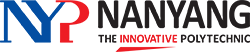

# IT3311 Assignment - Task 1: Text Classification

You are required to build a text classification model to predict the video category based on its title and transcript.

**Tasks:**

1. **Data Understanding**: Examine the dataset
2. **Data Preparation**: Prepares the data and all necessary preprocessing tasks
3. **Modelling**: Use different text representation and algorithms
4. **Evaluation**: Evaluates results from the algorithms and select the best model


<h2 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:15px;color:white;">Task 1: Text Classification of Video Categories</h2>
<h3>Done by: TEY JIA YING (202704D)<br><br>Module Code: IT3311-01</h3>

<a id='1'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Overview of Project</h1>

<h3>Overview:</h3>
I have structured the project into 6 key sections. Below, I will share with you the steps I took together with insights for each section.

1. [Basic Data Understanding](#1)
<br><br>
2. [Data Preparation](#2)<br>
    2.1 [Basic Data Preparation](#21)<br>
    2.2 [Data Preparation for Textual column - "Title","Transcript"](#22)<br>
    2.3 [Data Preparation for Category column](#23)
<br>
3. [Data Understanding - Exploratary Data Analysis](#3)<br>
    3.1 [Descriptive Statistical Analysis](#31)<br>
    3.2 [Video Category Analysis](#32)<br>
    3.3 [Textual Analysis across Video Cateory](#33)
 <br>   
4. [Modelling](#4)<br>
    4.1. [Data Preparation for modelling](#41)<br>
    4.2. [Text Representation](#42)<br>
    4.3. [Modelling](#43)<br>
     -  4.3.1 [Model 1: Logistic Regression](#431)<br>
           - 4.3.1.1 [BOW + LR](#4311)<br>
           - 4.3.1.2 [Tf-idf + LR](#4312)<br>
           - 4.3.1.3 [W2V + LR](#4313)<br>
     -  4.3.2 [Model 2: Naives Bayes](#432)<br>
           - 4.3.2.1 [BOW + MNB](#4321)<br>
           - 4.3.2.2 [Tf-idf + MNB](#4322)<br>
     -  4.3.3 [Model 3: Support Vector Machine](#433)<br>
           - 4.3.3.1 [BOW + SVM](#4331)<br>
           - 4.3.3.2 [Tf-idf + SVM](#4332)<br>
           - 4.3.3.3 [W2V + SVM](#4333)<br><br>

5. [Comparison of models](#5)
<br><br>
6. [Conclusion](#6)

**<b>Note: Click on the links to go to the respective section</b>**

<a id='1'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">Import libraries and download the packages</h1>

In [3]:
#import all modules
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import datasets
import os
#from sqlalchemy import create_engine
from IPython.core.display import display, HTML
from IPython.display import Image
from configparser import ConfigParser, ExtendedInterpolation
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
## for data
import json
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
## for plotting
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers
import re, nltk, spacy, string
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('punkt')

from sklearn.linear_model import LogisticRegression
#Run Logistic Regrssion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, roc_curve,auc,precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

C:\Users\JiaYi\AppData\Local\Temp\ipykernel_25080\956630488.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
C:\Users\JiaYi\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JiaYi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id='1'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">1. Data Understanding</h1>

In [24]:
df=pd.read_csv(r"videodata.csv")
df

,Unnamed: 0,Id,Channel,Title,Category,Transcript
0,1,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
1,2,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
2,3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...
3,5,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so..."
4,6,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...
...,...,...,...,...,...,...
1584,2510,DonD68byO0o,Parks and Recreation,Best of Andy Dwyer | Parks and Recreation,"Entertainment,Comedy",oh I guess while you get your medicine I'll ju...
1585,2511,iaEcZW0eyEg,Hell's Kitchen,Gordon Ramsay's Most Savage Moments | Hell's K...,Food,southern girl keisha hopes to get the women on...
1586,2512,sW9npZVpiMI,Joma Tech,why you NEED math for programming,"Tech,Comedy",[Music] okay [Music] jesus nope not jesus it's...
1587,2513,yl3MiR7XXAM,jacksepticeye,Happy Wheels - Part 1 | THIS GAME IS MY BITCH,VideoGames,"Top o' the mornin' to ya, laddies! My name i..."


## 1.1 Basic Data Understanding

To start off we will be doing some basic data understanding of the data

### 1.1.1 Understand data types

In [5]:
df.dtypes

Unnamed: 0     int64
Id            object
Channel       object
Title         object
Category      object
Transcript    object
dtype: object

It looks like there is one extra column 'Unamed: 0' in int format while the rest of the colums are in object data types. We will have to remove the extra column in the later stage of data preparation.

In [4]:
df.head()

,Unnamed: 0,Id,Channel,Title,Category,Transcript
0,1,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
1,2,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
2,3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...
3,5,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so..."
4,6,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...


As shown in the dataframe above all the columns are in textual format. Hence we would need to do textual processing in the later stage

There are in total 6 columns which contains the Id of the title and transcipt, the channel and category that each Id belongs to and finally the title and transcipt itself. 

### 1.1.2 Understand data shape/structure

In [12]:
print("Rows, columns: " + str(df.shape))

Rows, columns: (1589, 6)


There are in total 1589 rows and 6 columns

### 1.1.3 Understand columns

### 1.1.3.1 Understand Title and Transcript columns

To aid the cleaning processes later, we would need plot to see the content of the title and transcript to see the noises and what is in the textual data.

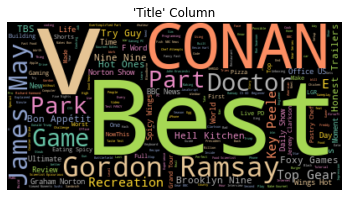

In [13]:
text = df['Title'].str.cat(sep=" ")
wordcloud = WordCloud(colormap='Set2').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("'Title' Column")
plt.axis("off")
plt.show()

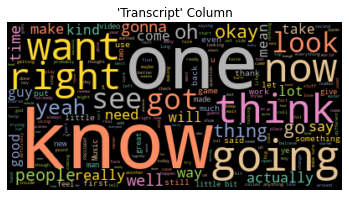

In [14]:
text = df['Transcript'].str.cat(sep=" ")
wordcloud = WordCloud(colormap='Set2').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("'Transcript' Column")
plt.axis("off")
plt.show()

From the word cloud above we see that there are not much problems with the text but we will go into detail for cleaning in the later sections

### 1.1.3.2 Understand Video Category columns

Next, I will be understanding the video category column. This column will be the target column to predict based on the title and transcript

In [13]:
print("Number of categories:",len(df.Category.unique()))
print()
print("Categories involved:",df.Category.unique())

Number of categories: 11

Categories involved: ['Food' 'Entertainment,Comedy' 'Entertainment' 'News' 'VideoGames'
 'Comedy' 'Comedy,Entertainment' 'Tech' 'Tech,Comedy' 'Tech,News'
 'Food,Entertainment']


We notice that there are in total of 11 categories with some overlapping catgeories. However, originally there is only 6 categories of Comedy, VideoGames, Food, Entertainment, News, Tech. We can hence decipher that the classification task in the later stage will be a multilabel classification  

So what exactly is multilabel classificaton and how is it different from other classification task?

<b>The differences between the types of classifications:</b>

1. <b> Binary classification:</b>
It is used when there are only two distinct classes and the data we want to classify belongs exclusively to one of those classes, e.g. to classify if a post about a given product as positive or negative;

2. <b>Multiclass classification:</b>
It is used when there are three or more classes and the data we want to classify belongs exclusively to one of those classes, e.g. to classify if a semaphore on an image is red, yellow or green;

3. <b>Multilabel classification:</b>
It is used when there are two or more classes and the data we want to classify may belong to none of the classes or all of them at the same time, e.g. to classify which traffic signs are contained on an image

Hence, this would mean we need to in the later stage when we preprocess the data such that there is only 6 unique categories. We will be looking more on how we can do this in the data preparation section

C:\Users\jiaying\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


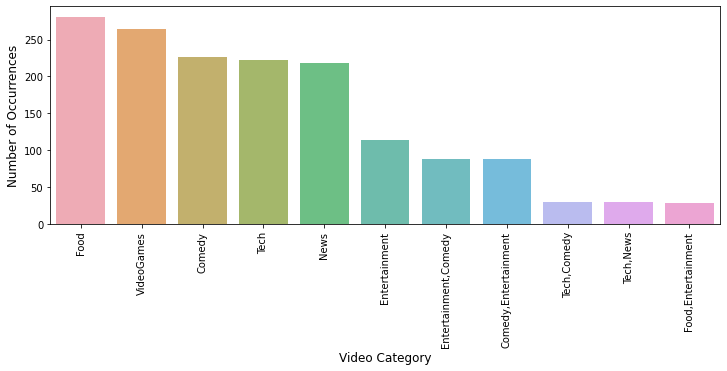

In [16]:
cnt_pro = df.Category.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Video Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()

We can see that the occurences with more than one category quite less as the bar chart height for the last 5 video catgeories [merged category] is lower than the individual categories. This would mean there is some cleaning to be done 

### 1.1.3.3 Understand channel columns

Next, we can understand the channel columns. 

In [14]:
print("Number of channels:",len(df.Channel.unique()))
print()
print("Channels involved:",df.Channel.unique())

Number of channels: 58

Channels involved: ['Mythical Kitchen' 'Munchies' 'Parks and Recreation' 'Doctor Who' 'A&E'
 'EpicNameBro' 'Insider News' 'Incognito Mode' 'Epicurious'
 'Brooklyn Nine-Nine' 'Austin Evans' 'Joma Tech' 'OverSimplified'
 'DRIVETRIBE' 'Internet Historian' 'TheWarOwl' 'Linus Tech Tips'
 'FoodTribe' 'Hardware Canucks' 'Web Dev Simplified' 'Bon Appétit'
 'BBC News' 'NowThis News' 'TechLinked' 'The Daily Show with Trevor Noah'
 'Top Gear' "Hell's Kitchen" 'NBC News' 'The Grand Tour' 'Gordon Ramsay'
 "Let's Game It Out" 'The Graham Norton Show' 'LevelCapGaming' 'Sky News'
 'Coder Coder' 'Fireship' 'First We Feast' 'Screen Junkies' 'MrBeast'
 'penguinz0' 'LGR' 'gameranx' 'jacksepticeye' 'Team Coco' 'Techquickie'
 'About To Eat' 'Shroud' 'Marques Brownlee' 'VICE' 'Markiplier'
 'The Try Guys' 'The F Word' 'BuzzFeedVideo' 'Eater' 'The Office'
 'Key & Peele' 'videogamedunkey' 'SomeGoodNews']


We can see that there are in total 58 channels

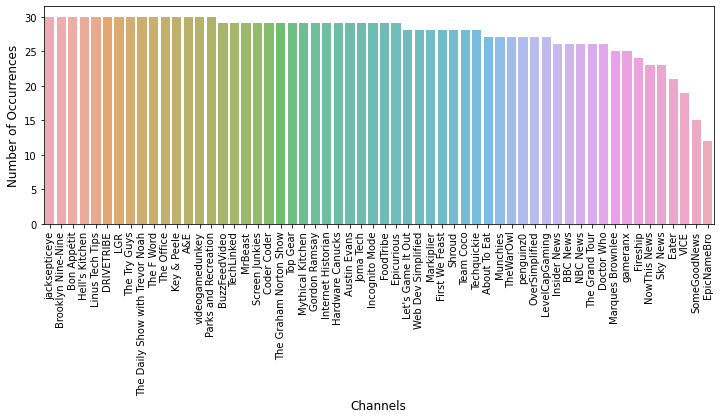

In [15]:
cnt_pro = df.Channel.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Channels', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Just to take note, that channel column would not be involved in our preprocessing in the later stage.

#### <i>Note: Also, I will be doing another round of data understanding after the data preparation, in Section 3: Exploratory Data Analysis as the data is not in cleaned state now. </i>

<a id='2'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">2. Data Preparation</h1>

Overview of this Section: <br>
2. [Data Preparation](#2)<br>
- 2.1 [Basic Data Preparation](#21)<br>
- 2.2 [Data Preparation for Textual column - "Title","Transcript"](#22)<br>
- 2.3 [Data Preparation for Category column](#23)

<a id='21'><h2>2.1 Basic Data Preparation</h2></a>

For basic data preparation, I will be checking and handling extra columns, missing values and duplicates.

### A) Removing Extra Columns

Noticed that when the file is imported, there is an extra column "Unnamed: 0". Hence, I will be dropping this column

In [26]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

### B) Checking for Missing Values

Next, I will be checking for missing values using .isnull().sum()

In [27]:
df.isnull().sum()

Id            0
Channel       0
Title         0
Category      0
Transcript    0
dtype: int64

<b>** Note: When I manually checked the file, there were quite some rows that were empty. However, for some reason it could not be detected by the pandas .isnull().sum(). function. Hence, I will be using Knime to remove those rows after the entire cleaning process that are empty as pandas is not able to detect it </b>

### C) Checking for Duplicates

From the above, we see that there is no missing values at all 

In [28]:
print("Number of duplicates in whole dataset:",df.duplicated(keep='first').sum())

Number of duplicates in whole dataset: 0


## 2.2 Data Preparation for Textual column - "Title","Transcript"

<b>As the main aim of the project is to predict the video category based on the title and transcript column, I will be merging both columns in to a single text columm as it would be easier to fit the merged textual column into the model in the later stages</B>

In [29]:
df['Text']=df['Title']+df['Transcript']

### A) Tokenization

First, I will be performing Tokenization as it is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

Why do we need to perform tokenization? <br>
These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [30]:
def list_to_str(cell):
    cell = ' '.join(c for c in cell if c not in "'[]")
    return cell

df["Text_Tokens"] = df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)
df['Text_cleaned']=df['Text_Tokens'].apply(list_to_str)

In [31]:
df.head()

,Id,Channel,Title,Category,Transcript,Text,Text_Tokens,Text_cleaned
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You...",$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,"[$, 420, Pizza, Hut, Stuffed, Crust, Pizza, |,...",$ 420 Pizza Hut Stuffed Crust Pizza | Fancy Fa...
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...,The Iconic $1 Pizza Slice of NYC | Street Food...,"[The, Iconic, $, 1, Pizza, Slice, of, NYC, |, ...",The Iconic $ 1 Pizza Slice of NYC | Street Foo...
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...,Ron Swanson: The Papa of Pawnee | Parks and Re...,"[Ron, Swanson, :, The, Papa, of, Pawnee, |, Pa...",Ron Swanson : The Papa of Pawnee | Parks and R...
3,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",The Doctor Defeats the Abzorbaloff | Love and ...,"[The, Doctor, Defeats, the, Abzorbaloff, |, Lo...",The Doctor Defeats the Abzorbaloff | Love and ...
4,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...,Live PD: Most Viewed Moments from Walton Count...,"[Live, PD, :, Most, Viewed, Moments, from, Wal...",Live PD : Most Viewed Moments from Walton Coun...


### B) Normalization

Secondly, I will be performing normalization on the text. There are 2 types of normalization
- Case Normalization - converting to lowercase
- Spelling Nornalization - handling of mispelled words

### B1) Case Normalization

By performing case normalization, when we normalize text, we attempt to reduce its randomness, bringing it closer to a predefined “standard”. This helps us to reduce the amount of different information that the computer has to deal with, and therefore improves efficiency

In [32]:
def case_normalization(text):
    text = text.lower()
    return text
df['Text_cleaned'] = df['Text_cleaned'].apply(case_normalization)
df.head()

,Id,Channel,Title,Category,Transcript,Text,Text_Tokens,Text_cleaned
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You...",$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,"[$, 420, Pizza, Hut, Stuffed, Crust, Pizza, |,...",$ 420 pizza hut stuffed crust pizza | fancy fa...
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...,The Iconic $1 Pizza Slice of NYC | Street Food...,"[The, Iconic, $, 1, Pizza, Slice, of, NYC, |, ...",the iconic $ 1 pizza slice of nyc | street foo...
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...,Ron Swanson: The Papa of Pawnee | Parks and Re...,"[Ron, Swanson, :, The, Papa, of, Pawnee, |, Pa...",ron swanson : the papa of pawnee | parks and r...
3,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",The Doctor Defeats the Abzorbaloff | Love and ...,"[The, Doctor, Defeats, the, Abzorbaloff, |, Lo...",the doctor defeats the abzorbaloff | love and ...
4,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...,Live PD: Most Viewed Moments from Walton Count...,"[Live, PD, :, Most, Viewed, Moments, from, Wal...",live pd : most viewed moments from walton coun...


### B2) Spelling Normalization 

Next, I will be performing Spelling normalization to normalize non-standard words into standard words in texts. 

In [32]:
def spell_check(text):
    return str(TextBlob(str(text)).correct())
df['Text_cleaned'] = df['Text_cleaned'].apply(spell_check)
df.head()

,Id,Channel,Title,Category,Transcript,Text,Text_Tokens,Text_cleaned
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You...",$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,"[$, 420, Pizza, Hut, Stuffed, Crust, Pizza, |,...",$ 420 pizza hut stuffed crust pizza | fancy fa...
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...,The Iconic $1 Pizza Slice of NYC | Street Food...,"[The, Iconic, $, 1, Pizza, Slice, of, NYC, |, ...",the iconic $ 1 pizza slice of nyc | street foo...
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...,Ron Swanson: The Papa of Pawnee | Parks and Re...,"[Ron, Swanson, :, The, Papa, of, Pawnee, |, Pa...",ron swanson : the papa of pawnee | parks and r...
3,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",The Doctor Defeats the Abzorbaloff | Love and ...,"[The, Doctor, Defeats, the, Abzorbaloff, |, Lo...",the doctor defeats the abzorbaloff | love and ...
4,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...,Live PD: Most Viewed Moments from Walton Count...,"[Live, PD, :, Most, Viewed, Moments, from, Wal...",live pd : most viewed moments from walton coun...


### C) Stop Words Removal

Next, I will be removing stop words to remove the low-level information from our text in order to give more focus to the important information

In [23]:
stop_words = set(stopwords.words('english'))

def remove_Stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

def join(t):
    return " ".join(t)
df['Text_cleaned'] = df['Text_cleaned'].apply(remove_Stopwords)
df['Text_cleaned'] = df['Text_cleaned'].apply(join)

### D) Removal

To ensure that only text exist, I have created 3 different function to remove pings, nums, hastags, special character and ascii

In [24]:
#remove_pings_nums_hashtags
def remove_pings_nums_hashtags(text):
    pattern = re.compile('\S*@\S*\s?')
    cleaned_text = pattern.sub('', text)
    pattern = re.compile('\S*#\S*\s?')
    cleaned_text = pattern.sub('', cleaned_text)
    output = re.sub(r'\d+', '', cleaned_text)
    output = output.strip()
    output = " ".join(output.split())
    return output

#remove special characters
def removing_special_characters(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[0-9]*", "", text)
    text = re.sub(r"(”|“|-|\+|`|#|,|;|\|)*", "", text)
    text = re.sub(r"&amp", "", text)        
    return text

def remove_ascii(text):
    encoded_string = text.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string

In [26]:
df['Text_cleaned'] = df['Text_cleaned'].apply(str).apply(remove_pings_nums_hashtags)
df['Text_cleaned'] = df['Text_cleaned'].apply(removing_special_characters)
df['Text_cleaned'] = df['Text_cleaned'].apply(remove_ascii)
df['Text_cleaned']= df['Text_cleaned'].str.replace('[{}]'.format(string.punctuation), '')
df.head()

<ipython-input-26-e60acd2c7b26>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text_cleaned']= df['Text_cleaned'].str.replace('[{}]'.format(string.punctuation), '')


,Id,Channel,Title,Category,Transcript,Text,Text_Tokens,Text_cleaned
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You...",$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,"[$, 420, Pizza, Hut, Stuffed, Crust, Pizza, |,...",pizza hut stuffed crust pizza fancy fast foo...
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...,The Iconic $1 Pizza Slice of NYC | Street Food...,"[The, Iconic, $, 1, Pizza, Slice, of, NYC, |, ...",iconic pizza slice nyc street food iconsif w...
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...,Ron Swanson: The Papa of Pawnee | Parks and Re...,"[Ron, Swanson, :, The, Papa, of, Pawnee, |, Pa...",ron swanson papa pawnee parks recreationapri...
3,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",The Doctor Defeats the Abzorbaloff | Love and ...,"[The, Doctor, Defeats, the, Abzorbaloff, |, Lo...",doctor defeats abzorbaloff love monsters doc...
4,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...,Live PD: Most Viewed Moments from Walton Count...,"[Live, PD, :, Most, Viewed, Moments, from, Wal...",live pd viewed moments walton county fl e ...


### E) Lemmatization

I will be using lemmatization instead of stemming as stemming works in a more simplistic manner by removing ends of words to
achieve the goal. For example, removing the “able” or “ed” in “acceptable” and
“accepted” to get the root word “accept”. However, this form of operation usually leads to errors. Lemmatization will usually
do a better job but requires input dictionaries.Word lemmatizing returns a real word even if it's
not the same word; it could be a synonym, but at least it's a real word.

In [27]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lem=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    return lem

df["Text_cleaned"]=df['Text_cleaned'].apply(lemmatize)
df['Text_cleaned'] = df['Text_cleaned'].apply(list_to_str)

In [28]:
df.head()

,Id,Channel,Title,Category,Transcript,Text,Text_Tokens,Text_cleaned
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You...",$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,"[$, 420, Pizza, Hut, Stuffed, Crust, Pizza, |,...",pizza hut stuffed crust pizza fancy fast food ...
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...,The Iconic $1 Pizza Slice of NYC | Street Food...,"[The, Iconic, $, 1, Pizza, Slice, of, NYC, |, ...",iconic pizza slice nyc street food iconsif wan...
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...,Ron Swanson: The Papa of Pawnee | Parks and Re...,"[Ron, Swanson, :, The, Papa, of, Pawnee, |, Pa...",ron swanson papa pawnee park recreationapril t...
3,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",The Doctor Defeats the Abzorbaloff | Love and ...,"[The, Doctor, Defeats, the, Abzorbaloff, |, Lo...",doctor defeat abzorbaloff love monster doctor ...
4,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...,Live PD: Most Viewed Moments from Walton Count...,"[Live, PD, :, Most, Viewed, Moments, from, Wal...",live pd view moment walton county fl e music p...


## 2.3 Data Preparation for Category column

As mentioned in the data understanding section, as this a multilabel classification, we would need to ensure there is only 6 unique categories in order for the modelling in the later stages

In [55]:
df['Category'].unique()

array(['Food', 'Entertainment,Comedy', 'Entertainment', 'News',
       'VideoGames', 'Comedy', 'Comedy,Entertainment', 'Tech',
       'Tech,Comedy', 'Tech,News', 'Food,Entertainment'], dtype=object)

In [56]:
def split_category(i):
    return i.split(",")
df['Category_Cleaned']=df['Category'].apply(split_category)

In [57]:
df['Category_Food']=0
df['Category_Tech']=0
df['Category_Entertainment']=0
df['Category_Comedy']=0
df['Category_News']=0
df['Category_VideoGames']=0

This piece of code extracts the categories involved in the 'Category_Cleaned' and add a count to the each category column if the particular category exists

In [58]:

for i in range(len(df)):
    for j in range(len(df['Category_Cleaned'][i])):
        if df['Category_Cleaned'][i][j]=='Food':
            df['Category_Food'][i]+=1
        elif df['Category_Cleaned'][i][j]=='Tech':
            df['Category_Tech'][i]+=1
        elif df['Category_Cleaned'][i][j]=='News':
            df['Category_News'][i]+=1
        elif df['Category_Cleaned'][i][j]=='Entertainment':
            df['Category_Entertainment'][i]+=1
        elif df['Category_Cleaned'][i][j]=='VideoGames':
            df['Category_VideoGames'][i]+=1
        elif df['Category_Cleaned'][i][j]=='Comedy':
            df['Category_Comedy'][i]+=1

In [59]:
df.head()

,Id,Channel,Title,Category,Transcript,Text_cleaned,Category_Cleaned,Category_Food,Category_Tech,Category_Entertainment,Category_Comedy,Category_News,Category_VideoGames
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You...",pizza hut stuff crust pizza fancy fast food my...,[Food],1,0,0,0,0,0
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...,the iconic pizza slice nyc street food iconsif...,[Food],1,0,0,0,0,0
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...,ron swanson papa pawnee park recreationapril p...,"[Entertainment, Comedy]",0,0,1,1,0,0
3,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so...",the doctor defeat abzorbaloff love monster doc...,[Entertainment],0,0,1,0,0,0
4,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...,live view moment walton county aemusic play we...,[News],0,0,0,0,1,0


In [60]:
df.to_csv(r"data\videodatacleaned.csv")

<a id='3'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3. Exploratory Data Analysis</h1>

After much data preparation, the data is cleaned for further analysis. The following will be the overview of my analysis I will be perfoming.<br>
3.1 [Descriptive Statistical Analysis](#31)<br>
3.2 [Video Category Analysis](#32)<br>
3.3 [Textual Analysis across Video Cateory](#33)

In [76]:
df_cleaned=pd.read_csv(r"data\videodatacleaned.csv",encoding='ISO-8859-1')
df=df_cleaned.drop(columns=["Unnamed: 0"])

<a id="31"><h2>3.1 Descriptive Statistical Analysis</h2></a>
After cleaning the data, we used the describe() function once again to look at the statistical summary of the numerical variables.

In [62]:
df.describe()

,Category_Food,Category_Tech,Category_Entertainment,Category_Comedy,Category_News,Category_VideoGames
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000
mean,0.192890,0.173140,0.206715,0.277156,0.152732,0.169190
std,0.394697,0.378493,0.405083,0.447742,0.359848,0.375043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From this dataframe, we may not be able to visualize at one glance the distrbution of all chracteristics. Hence, I have decided to plot the distribution of each characteristics in next section

<a id="32"><h2>3.2 Video Category Analysis</h2></a>

In this section we will be understanding the Video Category Columns where the following analysis will be performed to get a deeper understanding of the distribution and correlation between each categories. I will be analysing the textual information acorss each category.

In [71]:
categories=['Category_Food', 'Category_Tech', 'Category_Entertainment','Category_Comedy', 'Category_News', 'Category_VideoGames']

## 3.2.1 Distribution Analysis - Is the data balanced?

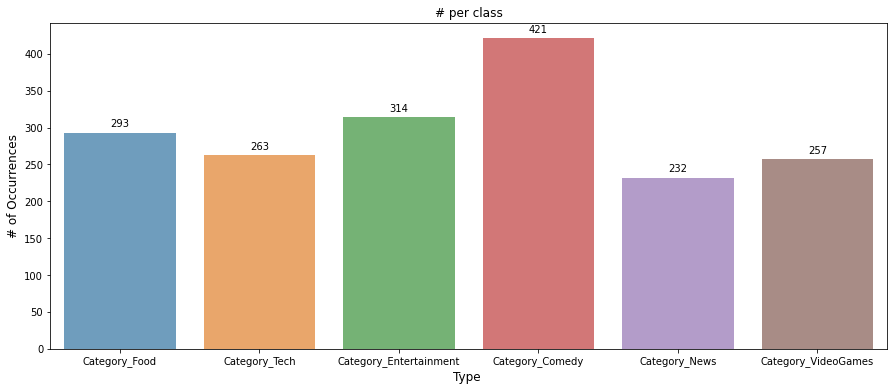

In [65]:
x=df[categories].sum()
#plot
plt.figure(figsize=(15,6))
ax= sns.barplot(x.index, x.values, alpha=0.7)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

From the graph we can see that there is imbalanced data across all video categories. However, as this a multilabel classifcation problem, it is not possible to achieve a good balance of samples as one Id may contain different number of categories and resmapling will not be possible to achieve. Hence, in the modelling section, I will be using the "weighted" f1-score to measure the performance as it is tailored for imbanced dataset where it assigns a weight to each variable based on the category

## 3.2.2  Multilabel Tags Occurrence Analysis - How many multilabelled text? & Which Category are likely to go together


In [22]:
df['Number of Tags']=df['Category_Food']+df['Category_Tech']+df['Category_Entertainment']+df['Category_Comedy']+df['Category_News']+df['Category_VideoGames']

### How many multilabelled text?

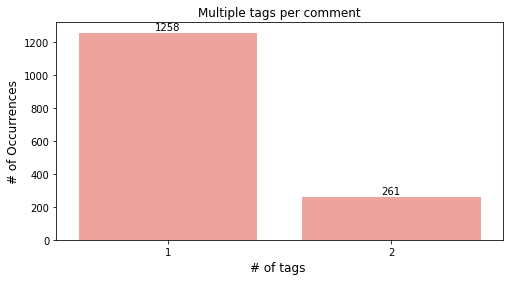

In [62]:
x=df[categories].sum(axis=1).value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color='salmon')
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

From the above bar chart, we can see that the maximum number of categories that each Id belongs is 2 categories. Also, the population of the 2 tags occurence is comparatively lesser by 79% 1 tag occurence. Hence the population of multilabelled Text is only 17%. We will be analysis which categories go together in the later section where i deep dive into category

### Which categories is likely to go together?


Text(0.5, 0, 'Type ')

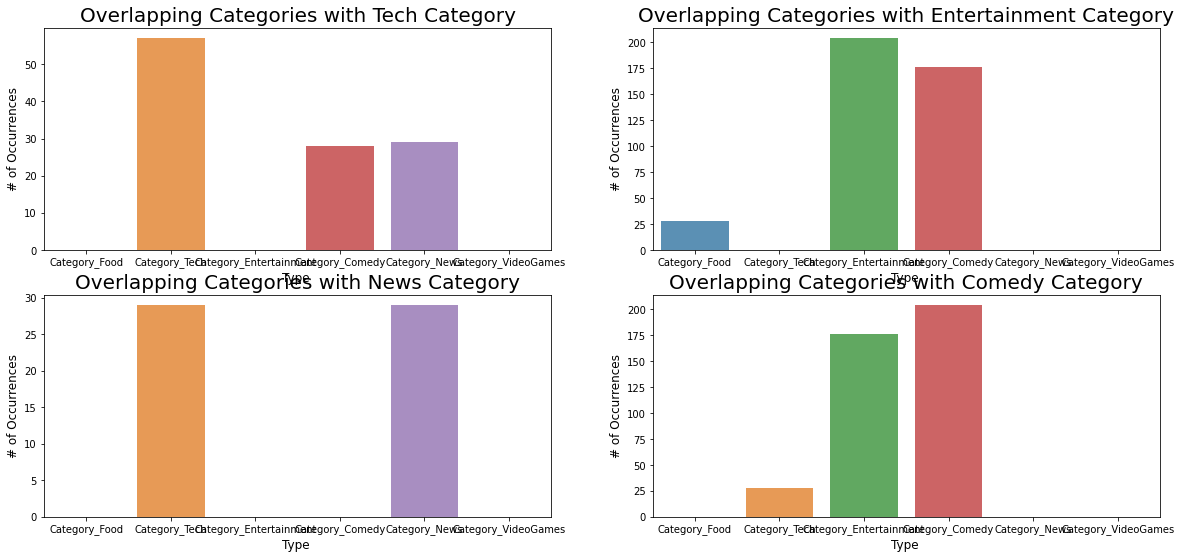

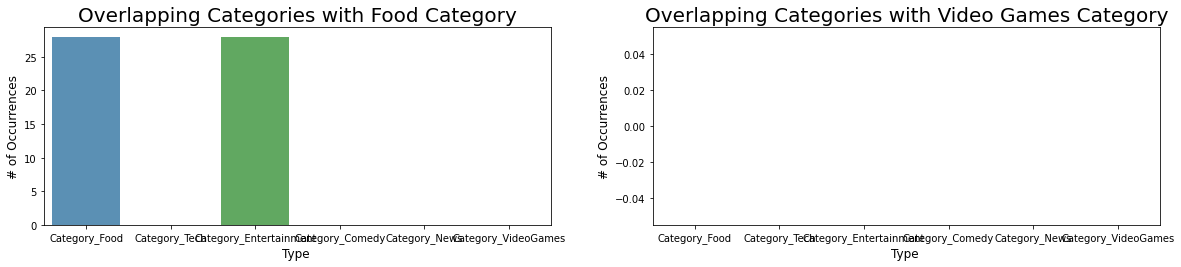

In [39]:
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 1)
Tech_category_df=df[df['Category_Tech']==1]
x=Tech_category_df[Tech_category_df["Number of Tags"]==2][categories].sum()
#plot
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Overlapping Categories with Tech Category",fontsize=20)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

plt.subplot(2, 2, 2)
Entertainment_category_df=df[df['Category_Entertainment']==1]
x=Entertainment_category_df[Entertainment_category_df["Number of Tags"]==2][categories].sum()
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Overlapping Categories with Entertainment Category",fontsize=20)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

plt.subplot(2, 2, 3)
News_category_df=df[df['Category_News']==1]
x=News_category_df[News_category_df["Number of Tags"]==2][categories].sum()
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Overlapping Categories with News Category",fontsize=20)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

plt.subplot(2, 2, 4)
comedy_category_df=df[df['Category_Comedy']==1]
x=comedy_category_df[comedy_category_df["Number of Tags"]==2][categories].sum()
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Overlapping Categories with Comedy Category",fontsize=20)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

plt.figure(figsize=(20,8))
plt.subplot(2, 2, 1)
Food_category_df=df[df['Category_Food']==1]
x=Food_category_df[Food_category_df["Number of Tags"]==2][categories].sum()
#plot
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Overlapping Categories with Food Category",fontsize=20)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

plt.subplot(2, 2, 2)
VideoGames_category_df=df[df['Category_VideoGames']==1]
x=VideoGames_category_df[VideoGames_category_df["Number of Tags"]==2][categories].sum()
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Overlapping Categories with Video Games Category",fontsize=20)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)


<h4>Insights:</h4>
    
1. Categories that go together with Tech? - Comedy & News
2. Categories that go together with Entertainment? - Food & Comedy
3. Categories that go together with News? - Tech
4. Categories that go together with Comedy?  - Tech & Entertainment 
5. Categories that go together with Food?  - Entertainment 
6.  Categories that go together with Video Games? - None

## 3.2.3 Correlation Analysis - Which categories are related?



<AxesSubplot:title={'center':'Correlation between categories'}>

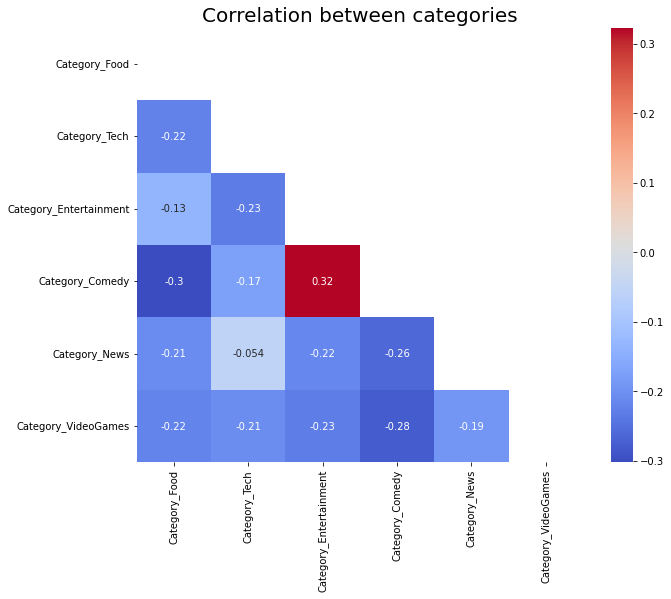

In [69]:
temp_df=df[categories]
corr=temp_df.corr()
plt.figure(figsize=(10,8))
plt.title("Correlation between categories",fontsize=20)
sns.heatmap(corr,cmap='coolwarm',mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

<h4>Insights:</h4>
<b>Correlation between video categories</b><br>
Overall correlation between the 6 categories is not very strong.
However, I have identified some categories with strong correlation between each other<br>
1. Comedy Vs Entertainment(0.32) <br>
2. Comedy Vs Food (-0.3)<br>
3. Comedy Vs Video Games(0.24)<br>

An interesting insight is that those categories with strong correlation always have the category comedy which would mean that the category comedy usually contains elements of entertainment, food and video games.

## 3.2.3 Text Analysis for each video category 

### 3.2.3.1 Distribution of text length across Video Category

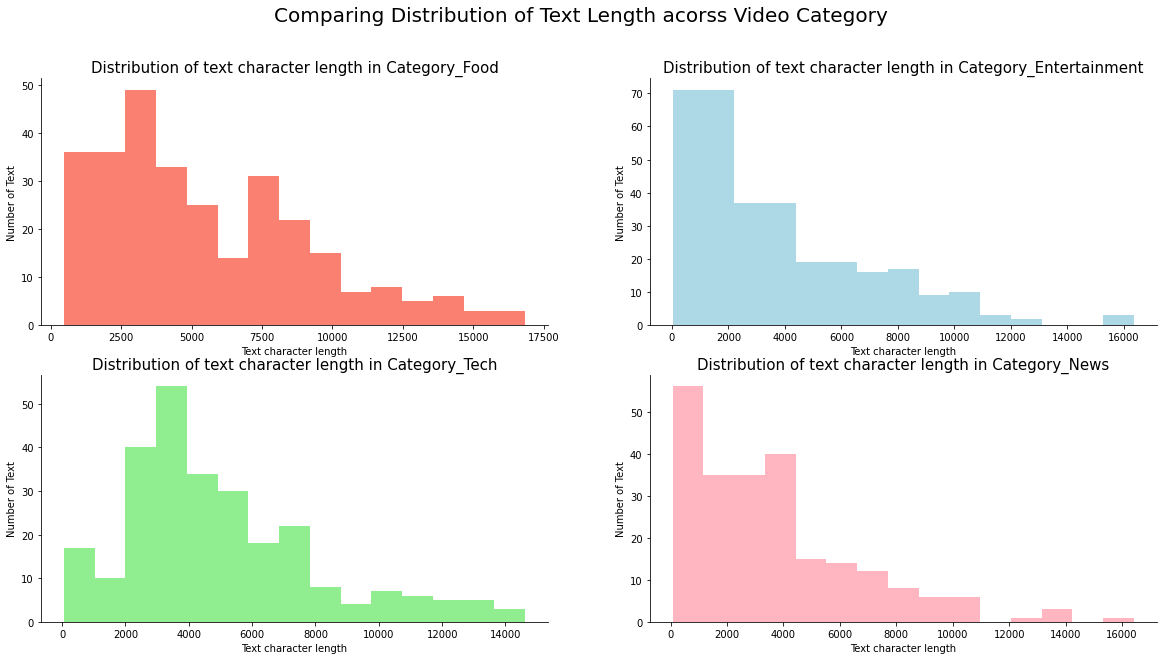

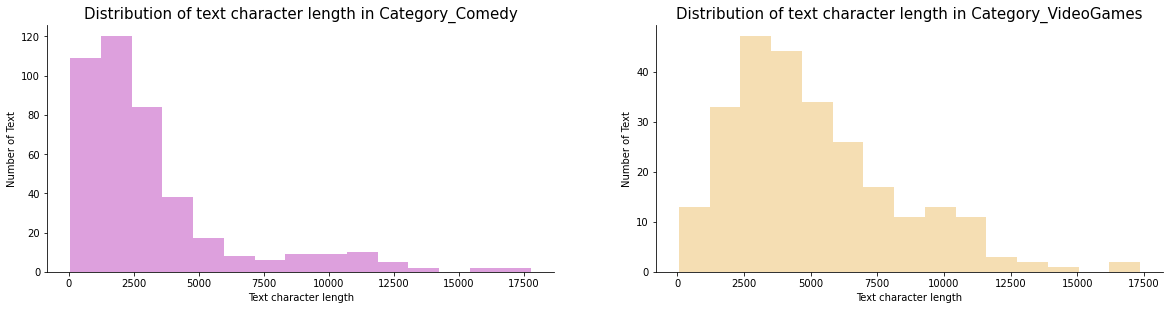

In [89]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparing Distribution of Text Length acorss Video Category",fontsize=20)
plt.subplot(2, 2, 1)
plt.hist([len(d) for d in df[df["Category_Food"]==1]['Text_cleaned']], bins = 15,color='salmon')
plt.title('Distribution of text character length in Category_Food',fontsize=15)
plt.ylabel('Number of Text')
plt.xlabel('Text character length')
sns.despine();

plt.subplot(2, 2, 2)
plt.hist([len(d) for d in df[df["Category_Entertainment"]==1]['Text_cleaned']], bins = 15,color='lightblue')
plt.title('Distribution of text character length in Category_Entertainment',fontsize=15)
plt.ylabel('Number of Text')
plt.xlabel('Text character length')
sns.despine();

plt.subplot(2, 2, 3)
plt.hist([len(d) for d in df[df["Category_Tech"]==1]['Text_cleaned']], bins = 15,color='lightgreen')
plt.title('Distribution of text character length in Category_Tech',fontsize=15)
plt.ylabel('Number of Text')
plt.xlabel('Text character length')
sns.despine();

plt.subplot(2, 2, 4)
plt.hist([len(d) for d in df[df["Category_News"]==1]['Text_cleaned']], bins = 15,color='lightpink')
plt.title('Distribution of text character length in Category_News',fontsize=15)
plt.ylabel('Number of Text')
plt.xlabel('Text character length')
sns.despine();

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.hist([len(d) for d in df[df["Category_Comedy"]==1]['Text_cleaned']], bins = 15,color='plum')
plt.title('Distribution of text character length in Category_Comedy',fontsize=15)
plt.ylabel('Number of Text')
plt.xlabel('Text character length')
sns.despine();

plt.subplot(2, 2, 2)
plt.hist([len(d) for d in df[df["Category_VideoGames"]==1]['Text_cleaned']], bins = 15,color='wheat')
plt.title('Distribution of text character length in Category_VideoGames',fontsize=15)
plt.ylabel('Number of Text')
plt.xlabel('Text character length')
sns.despine();

<h4> Insights:</h4>
We can see that acorss all categories, the distribution of text length usally populates around 25000
<h4>Categories that have an right-skewed distribution</h4>

1. Entertainment Category: The distribution chart of entertainment category is very right-skewed which means that the text length is generally less in this dataset. The text length generally ranges between 0 to 4000 words where the distribution is decreases when the text length increases.<br>

2. Comedy Category: The distribution chart of comedy category is very right-skewed which means that the text length is generally less in this dataset. The text length generally ranges between 0 to 2500  words where the distribution is decreases when the text length increases.<br>

3. Video Games Category: The distribution chart of comedy category is right-skewed which means that the text length is generally less in this dataset. The text length generally ranges between 2500 to 6000  words where the distribution is decreases when the text length increases. It has a generally higher text length than the enetertainment and comedy where the mode is higher at 5000.<br>

4. News Category: The distribution chart of comedy category is right-skewed which means that the text length is generally less in this dataset. The text length generally ranges between 0 to 4000  words where the distribution is decreases when the text length increases.<br>


<h4>Categories that have an multimodal distribution</h4> 

1. Food Category: The distribution chart of comedy category is has 2 distribution peaks hence it is a multimodal distibuion which means that the text length is generally distributed . 1st peak is at 4000 text length while the 2nd peak is at 7500 text lengthThe text length generally ranges between 0 to 4000  words.<br>

2. Tech Category: The distribution chart of comedy category is has 2 distribution peaks hence it is a multimodal distibuion which means that the text length is generally distributed . 1st peak is at 2000 text length while the 2nd peak is at 4000 text length and the 3rd peak is at 8000.<br>


<h4>Categories that have an symmetical distribution</h4>
【None】
<h4>Categories that have an left-skewed distribution</h4> 
【None】



### 3.2.3.2 Distribution of unique words across Video Category

Text(0.5, 0, 'Percent unique words')

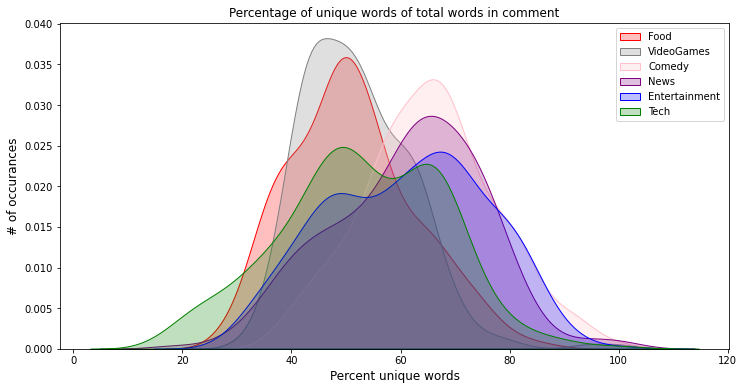

In [21]:
df['count_word']=df["Text_cleaned"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["Text_cleaned"].apply(lambda x: len(set(str(x).split())))
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
plt.figure(figsize=(12,6))


plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)

ax=sns.kdeplot(df[df.Category_Food == 1].word_unique_percent, label="Food",shade=True,color='r')

ax=sns.kdeplot(df[df.Category_VideoGames == 1].word_unique_percent, label="VideoGames",shade=True,color='gray')
ax=sns.kdeplot(df[df.Category_Comedy == 1].word_unique_percent, label="Comedy",shade=True,color='pink')
ax=sns.kdeplot(df[df.Category_News == 1].word_unique_percent, label="News",shade=True,color='purple')
ax=sns.kdeplot(df[df.Category_Entertainment == 1].word_unique_percent, label="Entertainment",shade=True,color='blue')
ax=sns.kdeplot(df[df.Category_Tech == 1].word_unique_percent, label="Tech",shade=True,color='g')
plt.legend()
plt.ylabel('# of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)


From the above kernel density estimate (KDE) plot & bar graph we can visualize the distribution of unqiue words in a dataset. 

<h4> Insights:</h4>
<h4>Categories that have an right-skewed distribution - Lower percent of unique word</h4>
1. Video Games：The graph is right skewed with the highest occurence (0.038） of lower percentage of unique words at 50%<br>
2. Food: The graph is right skewed with the seocnd highest occurence (0.035） of lower percentage of unique words at 50%  <br>

<h4>Categories that have an left-skewed distribution - Higher percentage of unqiue word</h4>
1. Comedy:The graph is left skewed with the highest occurence (0.033） of lower percentage of unique words at 70%<br>
2. News :The graph is left skewed with the second highest occurence (0.027） of lower percentage of unique words at 70%<br>
3. Entertainment:The graph is left skewed with the third highest occurence (0.033） of lower percentage of unique words at 70%<br>
<h4>Categories that have a multimodal distribution </h4>
1. Tech:The graph has 2 peaks where the 1st peak has an occurrence(0.025) of 50% of unique words while the second peak has a lower occurrence(0.022) of 70% unique words<br>


### 3.2.3.3 Textual Analysis across Video Category

Next, I will doing a textual analysis across all categories

### 3.2.3.3.1 Textual Analysis across Video Category - Word Cloud

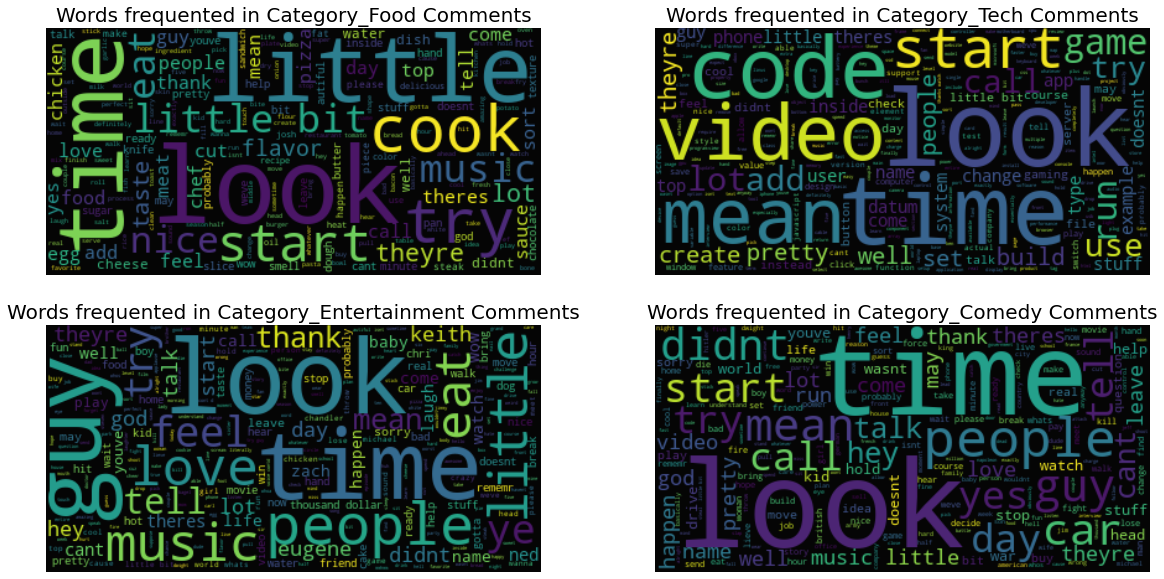

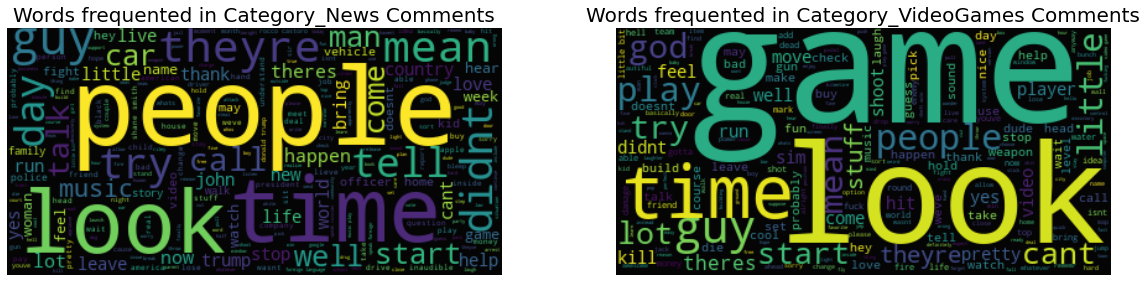

In [77]:
from wordcloud import WordCloud ,STOPWORDS
stopword=list(STOPWORDS)+['one','s','nt','re','go','know','see','na','say','yeah','oh','okay','think','want','m','gon','let','right','actually']
plt.figure(figsize=(20,10))
color=['gist_earth','black','green','blue']
categories=['Category_Food', 'Category_Tech', 'Category_Entertainment','Category_Comedy']
for i in range(len(categories)):
    text=df[df[categories[i]]==1]['Text_cleaned'].values
    wc= WordCloud(max_words=4000,stopwords=stopword)
    wc.generate(" ".join(text))

    plt.subplot(int('22'+str(i+1)))
    plt.axis("off")
    plt.title("Words frequented in "+categories[i]+ " Comments", fontsize=20)
    plt.imshow(wc, alpha=0.98, interpolation='bilinear')

plt.figure(figsize=(20,10))
categories=['Category_News', 'Category_VideoGames']
for i in range(len(categories)):
    text=df[df[categories[i]]==1]['Text_cleaned'].values
    wc= WordCloud(max_words=4000,stopwords=stopword)
    wc.generate(" ".join(text))

    plt.subplot(int('22'+str(i+1)))
    plt.axis("off")
    plt.title("Words frequented in "+categories[i]+ " Comments", fontsize=20)
    plt.imshow(wc, alpha=0.98, interpolation='bilinear')

I have plotted a word cloud that summarises the words that exist in the category. We can generally see the main words that exist such as: 
1. Food Category:Look, cook
2. Tech category: Code, Video
3. Entertainment category: Look guy time love 
4. Comedy Category: time look 
5. News Category: people time 
6. Video Games Category: game look

Seems like the most common word across all categories is look. However this analysis is too brief hence, i will be deep diving into the bigrams and trigrams that exist in each category and derive further and more meaningful textual analysis

### 3.2.3.3.2 Textual Analysis across Video Category - Unigram/Bigram/Trigram

In this section I will be analysing the bigrams and trigrams in  each category

In [78]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
categories=['Category_Food', 'Category_Tech', 'Category_Entertainment','Category_Comedy', 'Category_News', 'Category_VideoGames']

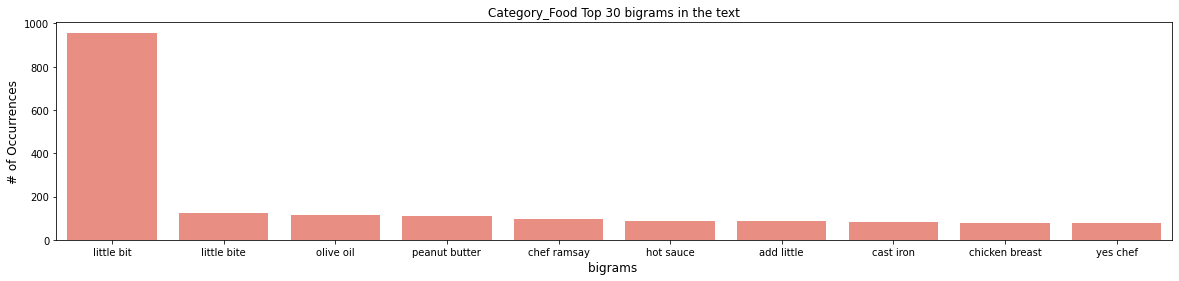

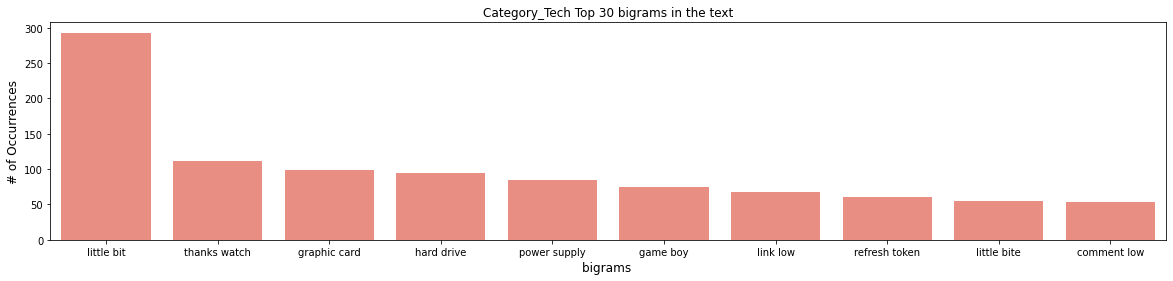

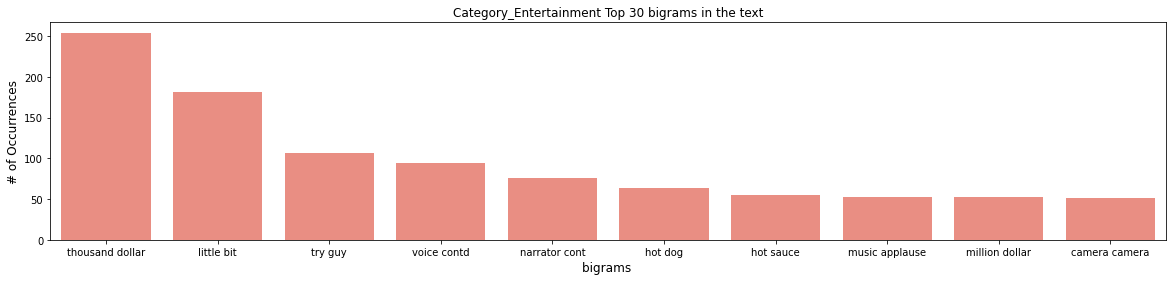

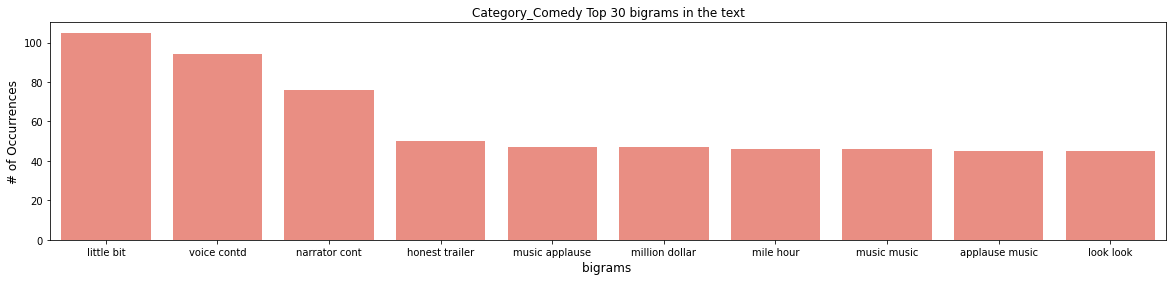

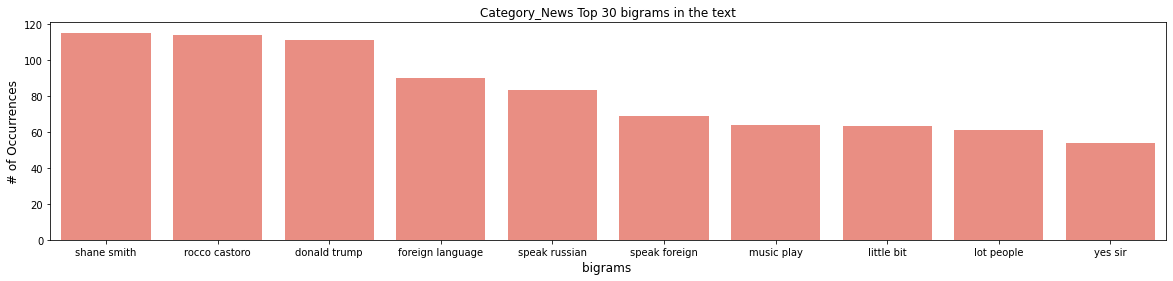

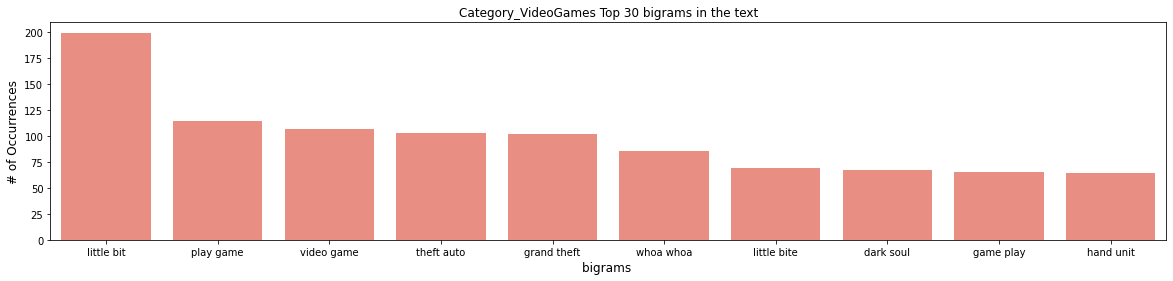

In [339]:
for i in range(len(categories)):
    common_words = get_top_n_bigram(df[df[categories[i]]==1]['Text_cleaned'], 10)
    df2 = pd.DataFrame(common_words, columns = ['bigram' , 'WCount'])
    plt.figure(figsize=(20,4))
    ax= sns.barplot(df2.bigram.values, df2.WCount.values, color='salmon')
    plt.title(categories[i]+" Top 30 bigrams in the text")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('bigrams ', fontsize=12)


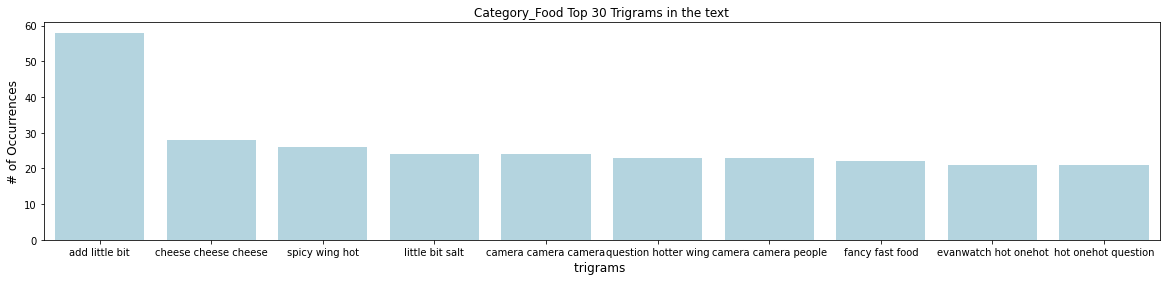

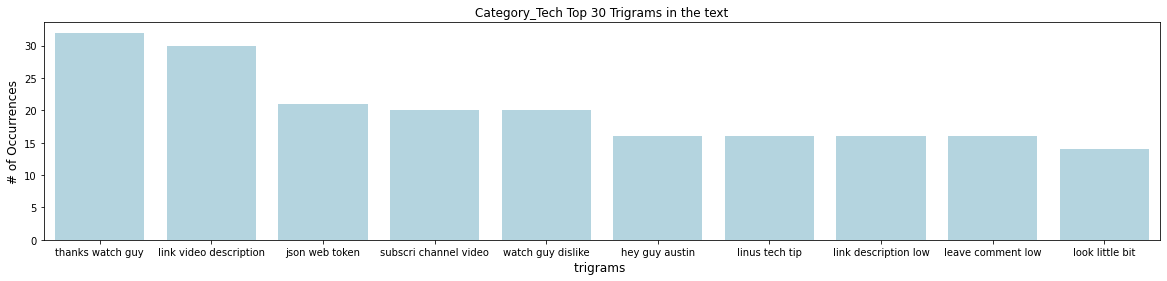

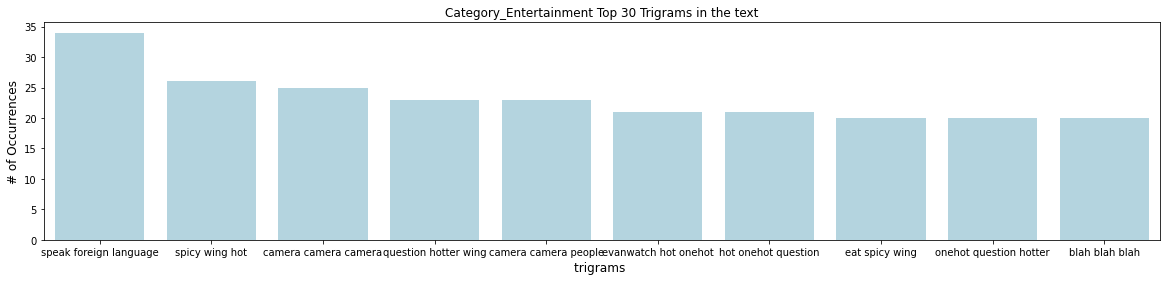

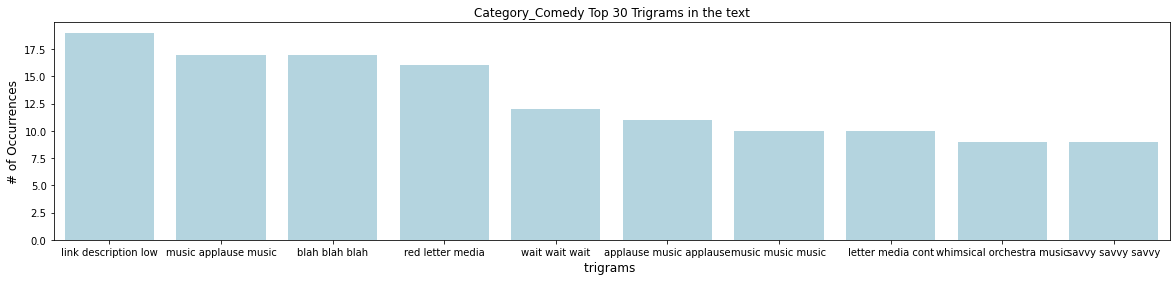

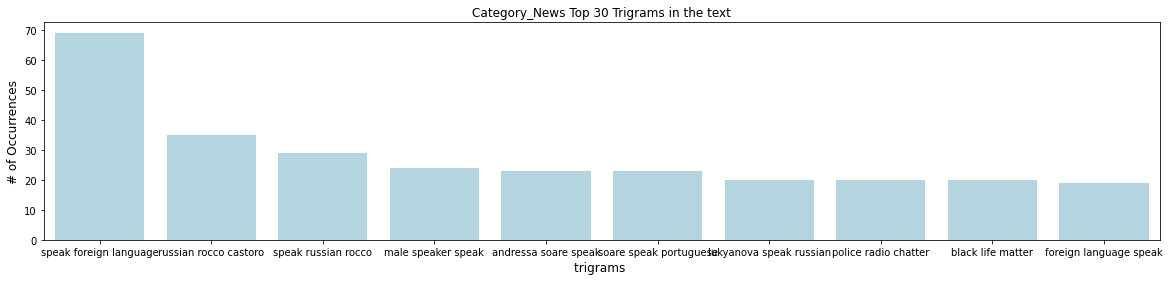

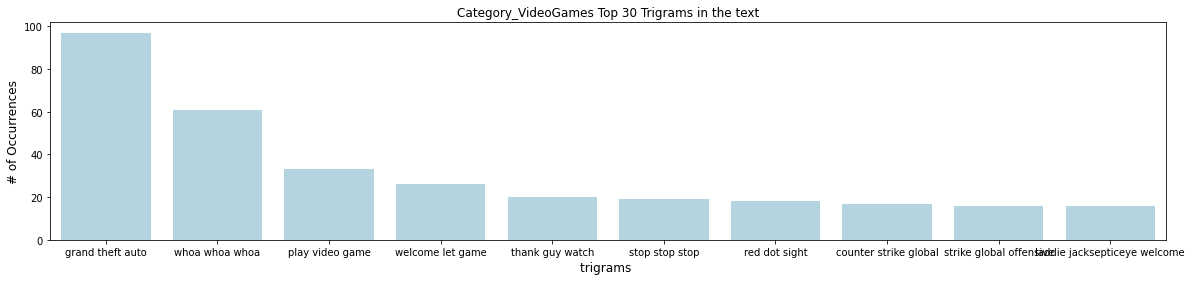

In [338]:
for i in range(len(categories)):
    common_words = get_top_n_trigram(df[df[categories[i]]==1]['Text_cleaned'], 10)
    df2 = pd.DataFrame(common_words, columns = ['trigram' , 'WCount'])
    plt.figure(figsize=(20,4))
    ax= sns.barplot(df2.trigram.values, df2.WCount.values, color='lightblue')
    plt.title(categories[i]+" Top 30 Trigrams in the text")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('trigrams ', fontsize=12)


<br>
<b>In the table below, I have summarised the top bigrams and trigrams found in each category and done textual analysis of each category terms and phrases. </b>
<table width='100%'>
    <thead>
        <td><b><u>Category</u></b></td>
        <td><b><u>Top Bigrams</u></b></td>
        <td><b><u>Top Trigrams</u></b></td>
        <td><b><u>Textual Analysis of Category </u></b></td>
    </thead>
    <tr>
        <td>Food</td>
        <td>'little bit', 'little bite', 'olive oil', 'peanut butter', 'chef ramsay', 'hot sauce', 'add little', 'cast iron', 'chicken breast', 'yes chef'</td>
        <td>'add little bit', 'cheese cheese cheese', 'spicy wing hot', 'little bit salt', 'camera camera camera', 'question hotter wing', 'camera camera people', 'fancy fast food', 'evanwatch hot onehot', 'hot onehot question'</td>
        <td>Contains elements of food and food elements</td>
    </tr>
    <tr>
        <td>Tech</td>
        <td>'little bit', 'thanks watch', 'graphic card', 'hard drive', 'power supply', 'game boy', 'link low', 'refresh token', 'little bite', 'comment low''</td>
        <td>'thanks watch guy', 'link video description', 'json web token', 'subscri channel video', 'watch guy dislike', 'hey guy austin', 'linus tech tip', 'link description low', 'leave comment low', 'look little bit'</td>
        <td>Contains elements of YouTube, computer hardware. Words from this category are more towards YouTube and programming languages.</td>
    </tr>
    <tr>
        <td>Entertainment</td>
        <td>'thousand dollar', 'little bit', 'try guy', 'voice contd', 'narrator cont', 'hot dog', 'hot sauce', 'music applause', 'million dollar', 'camera camera'</td>
        <td>'speak foreign language', 'spicy wing hot', 'camera camera camera', 'question hotter wing', 'camera camera people', 'evanwatch hot onehot', 'hot onehot question', 'eat spicy wing', 'onehot question hotter', 'blah blah blah'</td>
        <td>Contains elements of narrator, money, file. In general, bigrams and trigrams from this category is quite general and random as it even contains elements of food. This may be because it has multilabel with other category</td>
    </tr>
    <tr>
        <td>Comedy</td>
        <td>'little bit', 'voice contd', 'narrator cont', 'honest trailer', 'music applause', 'million dollar', 'mile hour', 'music music', 'applause music', 'look look'</td>
        <td>'link description low', 'music applause music', 'blah blah blah', 'red letter media', 'wait wait wait', 'applause music applause', 'music music music', 'letter media cont', 'whimsical orchestra music', 'savvy savvy savvy'</td>
        <td>Elements of shows such as music, applause, film,media and random slangs such as blah。 Words from this  category are more causual and in laymen terms</td>
    </tr>
    <tr>
        <td>News</td>
        <td>'shane smith', 'rocco castoro', 'donald trump', 'foreign language', 'speak russian', 'speak foreign', 'music play', 'little bit', 'lot people', 'yes sir'</td>
        <td>'speak foreign language', 'russian rocco castoro', 'speak russian rocco', 'male speaker speak', 'andressa soare speak', 'soare speak portuguese', 'lukyanova speak russian', 'police radio chatter', 'black life matter', 'foreign language speak'</td>
        <td>Contains names of political figures and different languages. Also contains news matter and headlines</td>
    </tr>
    <tr>
        <td>Video Games</td>
        <td>'little bit', 'play game', 'video game', 'theft auto', 'grand theft', 'whoa whoa', 'little bite', 'dark soul', 'game play', 'hand unit'</td>
        <td>'grand theft auto', 'whoa whoa whoa', 'play video game', 'welcome let game', 'thank guy watch', 'stop stop stop', 'red dot sight', 'counter strike global', 'strike global offensive', 'laddie jacksepticeye welcome'</td>
        <td>Contains names of games and actions in the games</td>
    </tr>
</table>
   

<a id='3'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">4. Modelling, Evaluation and Prediction</h1>

4. [Modelling](#4)<br>
    4.1. [Data Preparation for modelling](#41)<br>
    4.2. [Text Representation](#42)<br>
    4.3. [Modelling](#43)<br>
     -  4.3.1 [Model 1: Logistic Regression](#431)<br>
           - 4.3.1.1 [BOW + LR](#4311)<br>
           - 4.3.1.2 [Tf-idf + LR](#4312)<br>
           - 4.3.1.3 [W2V + LR](#4313)<br>
     -  4.3.2 [Model 2: Naives Bayes](#432)<br>
           - 4.3.2.1 [BOW + MNB](#4321)<br>
           - 4.3.2.2 [Tf-idf + MNB](#4322)<br>
     -  4.3.3 [Model 3: Support Vector Machine](#433)<br>
           - 4.3.3.1 [BOW + SVM](#4331)<br>
           - 4.3.3.2 [Tf-idf + SVM](#4332)<br>
           - 4.3.3.3 [W2V + SVM](#4333)<br>



<a id='41'><h2>4.1 Data Preparation for modelling</h2></a>

In [84]:
df_cleaned=pd.read_csv(r"data\videodatacleaned.csv",encoding='ISO-8859-1')
df=df_cleaned.drop(columns=["Unnamed: 0"])

### 4.1.1 Split Input Features and Label

In [85]:
df.columns

Index(['Id', 'Channel', 'Category', 'Text_cleaned', 'Category_Cleaned',
       'Category_Food', 'Category_Tech', 'Category_Entertainment',
       'Category_Comedy', 'Category_News', 'Category_VideoGames'],
      dtype='object')

In [156]:
X=df['Text_cleaned']
y=df[['Category_Food','Category_Tech',"Category_Entertainment",'Category_VideoGames','Category_Comedy','Category_News']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9)

In [87]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print()
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1215,)
y_train shape: (1215, 6)

X_test shape: (304,)
y_test shape: (304, 6)


Take note that for shape of y_train adn y_test, there would be 6 columns as there is 6 different categories involved

### 4.1.2 Data Balancing

In [71]:
print(df["Category_Comedy"].value_counts())
print(df["Category_Entertainment"].value_counts())
print(df["Category_Food"].value_counts())
print(df["Category_Tech"].value_counts())
print(df["Category_VideoGames"].value_counts())
print(df["Category_News"].value_counts())

0    1098
1     421
Name: Category_Comedy, dtype: int64
0    1205
1     314
Name: Category_Entertainment, dtype: int64
0    1226
1     293
Name: Category_Food, dtype: int64
0    1256
1     263
Name: Category_Tech, dtype: int64
0    1262
1     257
Name: Category_VideoGames, dtype: int64
0    1287
1     232
Name: Category_News, dtype: int64


I am working with an imbalanced dataset where there is imbalanced occurrence across all video categories. However, as this a multilabel classifcation problem, it is not possible to achieve a good balance of samples as one Id may contain different number of categories and resmapling will not be possible to achieve. Hence, in the modelling section, I will be using the "weighted" f1-score to measure the performance as it is tailored for imbanced dataset where it assigns a weight to each variable based on the category where all classes are equally important, I would be using f1_weighted metrics in the later section as it takes into account the importance of all classes by assigning a weight to each of them when tabulating the results.

<a id='42'><h2>4.2 Text Representation</h2></a>

For text representation, I will be using in total of 3 maim text representations namely:
1. Bag of Words(BOW)
2. Term frequency-inverse document frequency(tf-idf) 
3. Word2vec(W2V).

### 4.2.1 Bag-Of-Words (BOW)

Bag of Words is a representation of a document as an unordered set of words, with respective weighting. It does not capture any sematic meanings from the word but instead the occurrence weighting.

In [157]:
BOW_vectorizer = CountVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))
X_train_BOW = BOW_vectorizer.fit_transform(X_train)
X_test_BOW = BOW_vectorizer.transform(X_test)
X_BOW = BOW_vectorizer.transform(X)


I have plotted out a heatmap to visualize the frequencies of 0 in the matrix.

Text(0.5, 1.0, 'Bag-Of-Words: Sparse Matrix Sample')

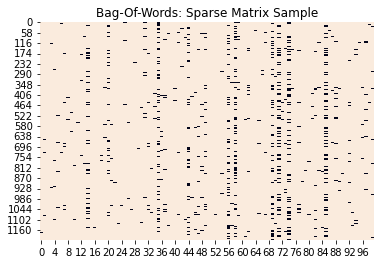

In [158]:
sns.heatmap(X_train_BOW.todense()[:,np.random.randint(0,X_train.shape[0],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Bag-Of-Words: Sparse Matrix Sample')

Hence, as shown, in the heatmap, if we were to use BOW, there would be many 0s in the matrix. Also, if the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too. Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what should be avoided). Also BOW is retaining no information on the grammar of the sentences nor on the ordering of the words in the text.

### 4.2.2 Term frequency-inverse document frequency(Tf-Idf)

Next text representation technique I have used is Term frequency-inverse document frequency(tf-idf) which is a numerical statistic that reflects how important a word is to a document
in a collection or corpus.

In [241]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_tfidf = tfidf_vectorizer.transform(X)


I have plotted out a heatmap to visualize the frequencies of 0 in the matrix.

Text(0.5, 1.0, 'Td-idf: Sparse Matrix Sample')

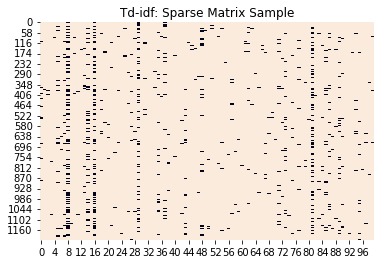

In [190]:
sns.heatmap(X_train_tfidf.todense()[:,np.random.randint(0,X_train.shape[0],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Td-idf: Sparse Matrix Sample')

As compared to the BOW, there are more blackdots on the heatmap showing that the sparse matrix contains less 0. However, the number of zero is still quite populated. Hence, I will be exploring word2vec as the next technique to decrease the population of 0 in the matrix.

### 4.2.3 Average Word2Vec

Now, I will be exploring word2vec whereby I will be converting each word into the vector. As shown, I will be using the pretrained model - Google News Vectors.

In [298]:
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
wv.init_sims(replace=True)

Take note that I will be using the average word2vec to reduce the dimensions. If im using pretrainned, for each word we wil get 300 dimnensions. However, the dimensions will be too large as an input feature. I have hence decided to use average word2vec to average out the dimensions for all vectors from all words


In [299]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.index_to_key:
            mean.append(wv.vectors[wv.key_to_index[word]])
            all_words.add(wv.key_to_index[word])

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    print()
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [300]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
X_train_word_average = word_averaging_list(wv,X_train.apply(w2v_tokenize_text).values)
X_test_word_average = word_averaging_list(wv,X_test.apply(w2v_tokenize_text).values)

In [301]:
    
X_word_average = word_averaging_list(wv,X.apply(w2v_tokenize_text).values)

In [302]:
X_train_W2V=X_train_word_average
X_test_W2V=X_test_word_average

In [303]:
X_W2V=X_word_average

Now, I have plotted out the heatmap to view the number of zeros in the matrix. The whole heatmap is black which mean that every value of the matrix contains a non-zero value. This is because given a large enough dataset, Word2Vec can make strong estimates about a word's meaning based on their occurrences in the text. These estimates yield word associations with other words in the corpus

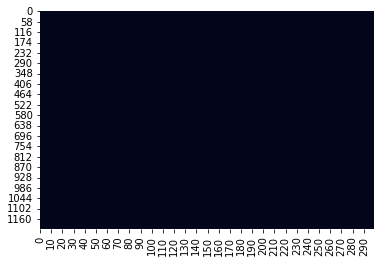

In [304]:
sns.heatmap(X_train_W2V==0, vmin=0, vmax=1, cbar=False)
plt.show()

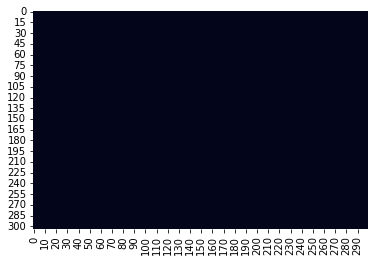

In [305]:
sns.heatmap(X_test_W2V==0, vmin=0, vmax=1, cbar=False)
plt.show()

## 4.3 Modelling

As our objective is to  better classify the each text according to video category, we will need to use classification model.<br>
These are the combinations of text representation & classification model:<br>
1. [Model 1: Logistic Regression](#431)
      - [BOW + Logistic Regression](#4311)
      - [Tf-idf + Logistic Regression](#4312)
      - [Word2Vec + Logistic Regression](#4313)<br>
      
2.  [Multinomial Nayes Bayes](#432)
      - [BOW + Multinomial Nayes Bayes](#4321)
      - [Tf-idf + Multinomial Nayes Bayes](#4322)<br>
      
3. [Support vector Machine](#433)
      - [BOW + SVM](#4331)
      - [Tf-idf + SVM](#4332)
      - [Word2Vec + SVM](#4333)

I will chosing this  
However, I will be ommiting <b>Word2Vec + Multinomial Naives Bayes</b> as word2vec does not support the combination.

<b>How will I be going through this process?</b>
1. Try out each combination of text representation + model
2. Fine tune parameters to give the BEST results for each combination
3. Compare the best results of each model (produce a table of original model and fine-tuned model)
4. Derive the model that gives the BEST results out of all models in the [model comparison section](#5)

<b>Metrics:</b><br>
<b>Why I use cross validation?</b><br>
I will be using cross validation rather than classfication report of precision, recall, f1-score and accuracy, as it allows a better representation assesment of the model performance as it test each and every portion of the dataset for each model. This is because our dataset.  Also, given that the dataset is small, it is better to get a good representative of each portion of our dataset to get a good and reliable test result.

<b>What area of metric will I be focusing on?</b><br>
However, I will be <b>focusing more on f1-score</b> in this project. This is becuase we are not targeting on health related classification or prediction where recall/false negatives are important. Also, our classes are more balanced and we will not need recall to find out the false negatives in each classes. Precision is also not our focus as we are not interested in finding out how well we can predict positive classes. Hence, the most appropriate metrics to be used is the f1-score as it takes into account of both precisionn and recall. 

Also, I will be using weighted f1-score given that the problem is a multilabel classification. Some text can belong to multiple categories and the categories count is imbalanced as mentioned previously.

In [237]:
def plot_CM(classifier,X_train,X_test):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    cm = confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=y.columns,yticklabels=y.columns, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)

def cross_val(classifier,X):
    result = cross_validate(classifier, X, y, cv=16, scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'])
    print("Average Accuracy:", np.mean(result['test_accuracy']))
    print("Average Precision:", np.mean(result['test_precision_weighted']))
    print("Average Recall:", np.mean(result['test_recall_weighted']))
    print("Average F1:", np.mean(result['test_f1_weighted']))
    

<a id='431'><h2 style="padding:10px;color:white;background-color:lightsalmon;text-align: center;margin-left:auto;margin-right:auto;border-radius:5px;"><font color="white">4.3.1 Model 1: Logistic Regression</h2>

First model I will be using logistic regression. Even though logistic regression is known for supporting binary classifcation, in this assignment, the main target would be predicting multilabelled categories. Hence, I would be using a multiouput classifier which consists of fitting one classifier per target. This is a simple strategy for extending classifiers that do not natively support multi-target classification. It supports the target variables with multiple outputs. Hence, the classifiers used can be either supporting binary or multiclass classification. 

I have also chosen logistic regression as Logistic Regression is very easy to understand, requires less training and performs well for simple datasets as well as when the data set is linearly separable. Also, it doesn't make any assumptions about the distributions of classes in feature space.

<a id='4311'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.1.1 BOW + Logistic Regression</h3>

### A: Building Model -  Logistic Regression

For the X_train, I would using Bag-Of-Words X_train which i have done in the earlier section.

In [153]:
logreg = LogisticRegression()
logreg_classifier =MultiOutputClassifier(logreg)
logreg_classifier.fit(X_train_BOW, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

### B: Model Evaluation

In [154]:
predictions = logreg_classifier.predict(X_test_BOW)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:",accuracy)
print(classification_report(y_test, predictions,target_names=y.columns))

Accuracy Score: 0.756578947368421
                        precision    recall  f1-score   support

         Category_Food       0.92      0.92      0.92        52
         Category_Tech       0.94      0.91      0.93        56
Category_Entertainment       0.92      0.75      0.83        61
   Category_VideoGames       0.96      0.93      0.95        57
       Category_Comedy       0.88      0.72      0.79        79
         Category_News       0.97      0.71      0.82        55

             micro avg       0.93      0.82      0.87       360
             macro avg       0.93      0.82      0.87       360
          weighted avg       0.93      0.82      0.87       360
           samples avg       0.82      0.82      0.81       360



In [145]:
cross_val(logreg_classifier,X_BOW)

Average Accuracy: 0.7589924359256812
Average Precision: 0.915284123680719
Average Recall: 0.8256422168405033
Average F1: 0.8646756157941811


We can see that results for <b>classification report performance is slightly the same (some times may be lower)  than from our cross validation performance</b>. Thus, in the next few models, <b>I will be using cross validation </b>as it allows me to test and train every portion of the dataset. Also, given that the dataset is small, it is better to get a good representative of each portion of our dataset to get a good and reliable test result.

We can see from the cross validation results that the model is quite good performing where f1-score is at 86% without any tuning

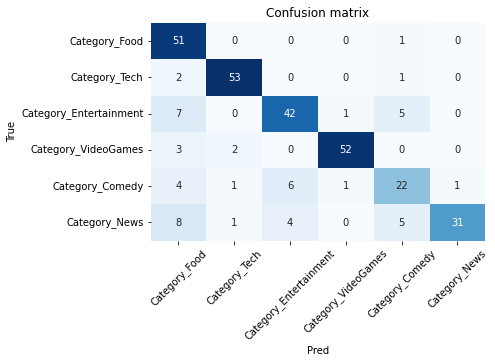

In [238]:
plot_CM(logreg_classifier,X_train_BOW,X_test_BOW)

From this confusion matrix we can also see that the True Positive for all categories. However, there are also small number of false predictions is existing as when predicting most categories, it is wrongly predicted. Hence we would need to fine tune our logistic regression model to seek for an improve in the classification perfromance.

### C: Tuning Parameters

<b>How will I be tuning the parameters?</b><br>
** Hyer-parameter tuning: Use Grid SearchCV to find the best combination of parameters that gives highest weighted f1-score

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# parameters for BOW & Logistic regression
params={'vect__max_features':[10000]，
        'vect__max_df':[0,3,0.4,0.5,0.6,0.7,0.8], 
        'vect__ngram_range':  [(1,1), (1,2), (2,2)],
         'estimator__max_iter':[1000,2000,3000,4000,5000,6000,7000,8000],
        'clf__estimator__solver':['newton-cg', 'lbfgs', 'liblinear'],
        "clf__estimator__penalty":['none', 'l1', 'l2', 'elasticnet'],
        "clf__estimator__C":[100, 10, 1.0, 0.1, 0.01]}

# pipeline to combine the text representation with the classifier

p = Pipeline([('vect', CountVectorizer()),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))])
grid_search = GridSearchCV(p, param_grid=params,scoring='f1_macro')

In [185]:
grid_search.fit(X_train, y_train)
BOW_LR_classifier_best=grid_search.best_estimator_
BOW_LR_classifier_best

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.01,
                                                                    solver='liblinear')))])

Average Accuracy: 0.8044652855543113
Average Precision: 0.8945055219646363
Average Recall: 0.889573110665731
Average F1: 0.8891111271696859


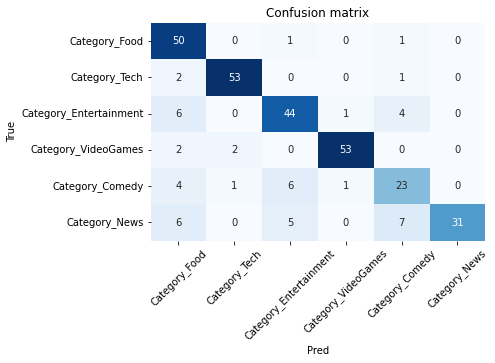

In [239]:
BOW_vectorizer = CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))
X_BOW = BOW_vectorizer.fit_transform(X)
X_train_BOW = BOW_vectorizer.fit_transform(X_train)
X_test_BOW = BOW_vectorizer.transform(X_test)
BOW_LR_classifier_best =MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=0.1, solver='liblinear'))

cross_val(BOW_LR_classifier_best,X_BOW)
plot_CM(BOW_LR_classifier_best,X_train_BOW,X_test_BOW)

Now, that we tuned the parameters for the Bag of Words and classifier, we can see that the model perfomance have improved by 3% from the original f1-score of 86% to 89%. From the confusion matrix, we can also see that the number of TP have increased for some categories such as comedy and entertainment

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', CountVectorizer()),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))]</td>
        <td>0.75</td>
        <td>0.91</td>
        <td>0.83</td>
        <td>0.86</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=0.1, solver='liblinear')))])
</td>
        <td style="background-color:salmon;color:white;">0.80</td>
        <td style="background-color:salmon;color:white;">0.90</td>
        <td style="background-color:salmon;color:white;">0.89</td>
        <td style="background-color:salmon;color:white;">0.89</td>
    </tr>
</table>

From this table we can see that we can use the tuned naives bayes model which is <b>Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=0.1, solver='liblinear')))])	</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned BOW + Logistic Regression Classifier is 89%
   

<a id='4312'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.1.2 Tdidf + Logistic Regression</h3>

### A: Building Model -  Logistic Regression

Now I will be fitting X_train with the X_train_tdidf 

In [242]:
logreg = LogisticRegression(class_weight='balanced', max_iter=3000)
logreg_classifier =MultiOutputClassifier(logreg)
logreg_classifier.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=3000))

### B: Model Evaluation

In [181]:
cross_val(logreg_classifier,X_train_tfidf)

Average Accuracy: 0.7696076901740517
Average Precision: 0.8903623871351776
Average Recall: 0.8605177584846093
Average F1: 0.8738408684294731


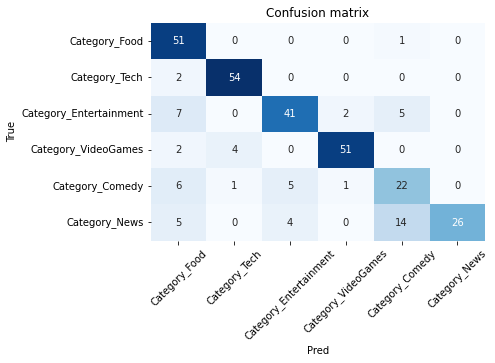

In [243]:
plot_CM(logreg_classifier,X_train_tfidf,X_test_tfidf)

It seems like the model performance f1-score is quite high at 87%. However, there numerous false predictions as shown in the confusion matrix. The only category with the right prediction would be comedy. Hence, we would need to tune the model in the next section.

### C: Tuning Parameters

For the tuning of paramters, I have included paramters for the tfidf vectorizer and also logistic regression such that the model can be tuned to the best results

In [185]:
logreg_classifier =MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000))
params={'vect__max_features':[10000]，
        'vect__max_df':[0,3,0.4,0.5,0.6,0.7,0.8], 
        'vect__ngram_range':  [(1,1), (1,2), (2,2)],
        'clf__estimator__class_weight':['balanced'],
         'estimator__max_iter':[1000,2000,3000,4000,5000,6000,7000,8000],
        'clf__estimator__solver':['newton-cg', 'lbfgs', 'liblinear'],
        "clf__estimator__penalty":['none', 'l1', 'l2', 'elasticnet'],
        "clf__estimator__C":[1000,100, 10, 1.0, 0.1, 0.01]}
p = Pipeline([('vect', CountVectorizer()),('clf', logreg_classifier)])
grid_search = GridSearchCV(p, param_grid=params,scoring='f1_macro')

In [72]:
grid_search.fit(X_train, y_train)
Tfidf_LR_classifier_best=grid_search.best_estimator_
Tfidf_LR_classifier_best

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf', MultiOutputClassifier(estimator=LogisticRegression()))])

In [229]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(X)
Tfidf_LR_classifier_best =MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=1000, solver='lbfgs'))
cross_val(BOW_LR_classifier_best,X_train_tfidf)

Average Accuracy: 0.83347502777211
Average Precision: 0.9443692446317062
Average Recall: 0.8753903776584491
Average F1: 0.9059401723808918


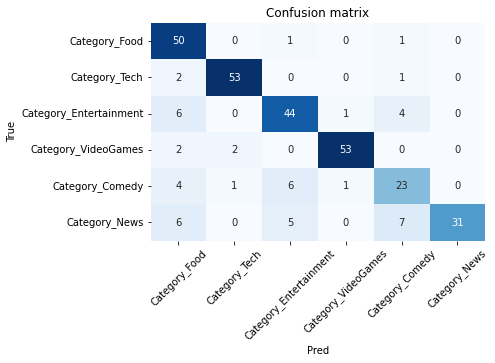

In [182]:
plot_CM(BOW_LR_classifier_best,X_train_BOW,X_test_BOW)

After tuning we can see that the f1-score increased by 4% to 91% and the number of true positive increased in categories such as entertainment video games and news. Most categories are accrately predicted as the True Positive Rate is high.

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2)),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))])</td>
        <td>0.77</td>
        <td>0.89</td>
        <td>0.86</td>
        <td>0.87</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2)),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))])</td>
        <td style="background-color:salmon;color:white;">0.83</td>
        <td style="background-color:salmon;color:white;">0.94</td>
        <td style="background-color:salmon;color:white;">0.88</td>
        <td style="background-color:salmon;color:white;">0.91</td>
    </tr>
</table>

From this table we can see that we can use the tuned logistic regression model which is<b> Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2)),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))])</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned Td-idf + Logistic Regression Classifier is 91%
   

<a id='4313'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.1.3 Word2Vec + Logistic Regression</h3>

### A: Building Model -  Logistic Regression

For this version of the model, I will be using word2vec model to fit into the model

In [306]:
logreg = LogisticRegression(class_weight='balanced', max_iter=3000)
logreg_classifier =MultiOutputClassifier(logreg)
logreg_classifier.fit(X_train_W2V, y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=3000))

### B: Model Evaluation

Average Accuracy: 0.44831326987681974
Average Precision: 0.6445268634123357
Average Recall: 0.8809127552046708
Average F1: 0.735046528137903


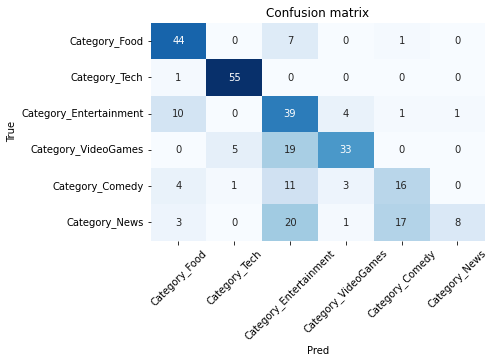

In [307]:
cross_val(logreg_classifier,X_W2V)
plot_CM(logreg_classifier,X_train_W2V,X_test_W2V)

We can see that without tuning, the f1-score is comparatively lower at 74%. Looking the conufsion matrix, for most classes there are quite high number of true positives, except for classes such as co,edy and news where TP is at 16 and 8 each. There are some wrong predictions made where some classes are wrongly predicted as entertainment and comedy.

### C: Tuning Parameters

In [21]:
logreg_classifier =MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000))
params={"estimator__class_weight":["balanced"],
        'estimator__solver':['newton-cg', 'lbfgs', 'liblinear'],
        'estimator__max_iter':[1000,2000,3000,4000,5000,6000,7000,8000],
        "estimator__penalty":['none',  'l2'],
        "estimator__C":[100, 10, 1.0, 0.1, 0.01]}
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=params,scoring='f1_weighted')

In [310]:
grid_search.fit(X_train_W2V, y_train)
logreg_classifier_best=grid_search.best_estimator_
logreg_classifier_best

MultiOutputClassifier(estimator=LogisticRegression(C=100,
                                                   class_weight='balanced',
                                                   max_iter=3000))

Average Accuracy: 0.6642497200447928
Average Precision: 0.789117634285687
Average Recall: 0.8843694048118155
Average F1: 0.8303011210434379


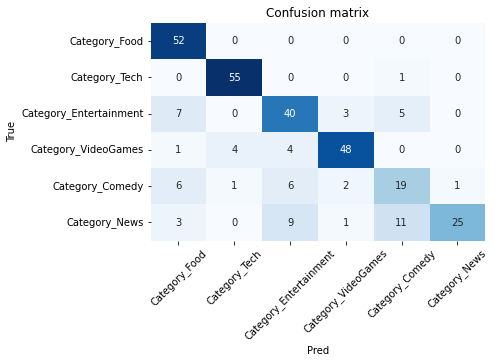

In [308]:
logreg_classifier_best=MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=100, penalty='l2',solver='lbfgs'))
cross_val(logreg_classifier_best,X_W2V)
plot_CM(logreg_classifier_best,X_train_W2V,X_test_W2V)

After much tuning, we can see that the f1-score have a 9% increase which also resulted in the increase of TP predicted for comedy and news. Some of the misclassified data has been reduce greatly

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000))</td>
        <td>0.45</td>
        <td>0.64</td>
        <td>0.88</td>
        <td>0.74</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=100, penalty='l2',solver='lbfgs'))</td>
        <td style="background-color:salmon;color:white;">0.66</td>
        <td style="background-color:salmon;color:white;">0.79</td>
        <td style="background-color:salmon;color:white;">0.88</td>
        <td style="background-color:salmon;color:white;">0.83</td>
    </tr>
</table>

From this table we can see that we can use the tuned logistic regression model which is <b>Word2Vec + MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=100, penalty='l2',solver='lbfgs'))</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned Word2Vec + Logistic Regression Classifier is 82%
   

<a id='432'><h2 style="padding:10px;color:white;background-color:lightsalmon;text-align: center;margin-left:auto;margin-right:auto;border-radius:5px;"><font color="white">4.3.2 Model 2: Naive Bayes</h2>

Second model I will be using naive bayes  regression. Even though naive bayes suuports both binary and multiclass classification. In this assignment, the main target would be predicting multilabelled categories. Hence, I would be using a multiouput classifier which consists of fitting one classifier per target. This is a simple strategy for extending classifiers that do not natively support multi-target classification. It supports the target variables with multiple outputs. Hence, the classifiers used can be either supporting binary or multiclass classification. I have chosen naives bayes as is simple and easy to implement, doesn't require as much training data, highly scalable with the number of predictors and data points.Especially for this  particular dataset where they is only 1500+ rows, it will be more practical to use naives bayes on this dataset.

<a id='4321'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.2.1 BOW + Naive Bayes</h3>

### A: Building Model -  Naives bayes

For the X_train, I would using Bag-Of-Words X_train which i have done in the earlier section.

In [244]:
from sklearn.naive_bayes import MultinomialNB
MNB_classifier =MultiOutputClassifier(MultinomialNB())
MNB_classifier.fit(X_train_BOW, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

### B: Model Evaluation

In [245]:
cross_val(MNB_classifier,X_BOW)

Average Accuracy: 0.6208963462900471
Average Precision: 0.737272320594134
Average Recall: 0.9485748274632785
Average F1: 0.8239714037628473


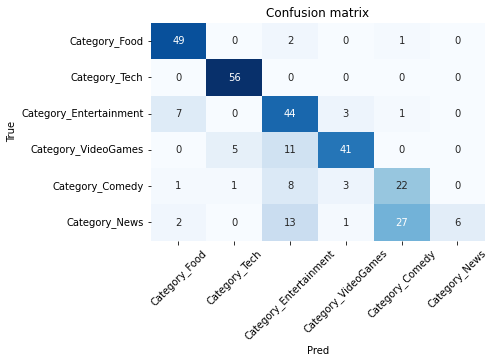

In [245]:
plot_CM(MNB_classifier,X_train_BOW,X_test_BOW)

We can see from the above results that most categories have all true positive, except for the news category where TP is quite low. Also, I noticed that the the new category has been mostly predicted wrongly as comedy category. The f1 score is at 82%. Now, let's tune the classifier to improve the model performance.

### C: Tuning Parameters

In [90]:
params={'vect__max_features':[10000]
    'vect__max_df':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
        'vect__ngram_range':  [(1,1),(1,2),(2,2)],
        'clf__estimator__fit_prior':[True,False],
       'clf_estimator__alpha':[0.0,1.0]}
p = Pipeline([('vect', TfidfVectorizer()),('clf', MultiOutputClassifier(MultinomialNB()))])
grid_search = GridSearchCV(p, param_grid=params,scoring='f1_weighted')

In [244]:
grid_search.fit(X_train, y_train)
BOW_MNB_classifier_best=grid_search.best_estimator_
BOW_MNB_classifier_best=Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=True,alpha=1)))])
BOW_MNB_classifier_best

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf',
                 MultiOutputClassifier(estimator=MultinomialNB(alpha=1)))])

In [267]:
BOW_vectorizer = CountVectorizer(max_df=0.99, max_features=10000, ngram_range=(1,2))
X_BOW = BOW_vectorizer.fit_transform(X)
X_train_BOW = BOW_vectorizer.fit_transform(X_train)
X_test_BOW = BOW_vectorizer.transform(X_test)
BOW_MNB_classifier_best =MultiOutputClassifier(MultinomialNB(fit_prior=False,alpha=1))

cross_val(BOW_MNB_classifier_best,X_BOW)

Average Accuracy: 0.6129199328107502
Average Precision: 0.7315518866809408
Average Recall: 0.9502497110007238
Average F1: 0.8199602427054268


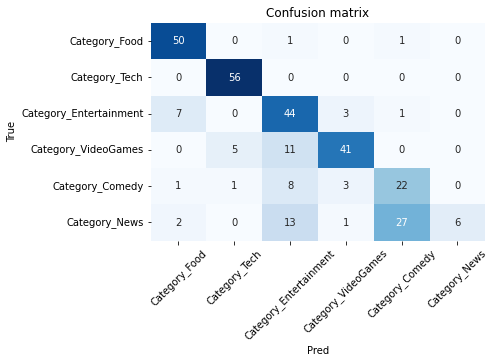

In [268]:
plot_CM(BOW_MNB_classifier_best,X_train_BOW,X_test_BOW)

After the model tuning, the model f1-score improved by 0.1%. We can see that other performance metrics remained the same. Confusion matrix showed that the misclassification problem exist given that the tuning did not help much. Hence, we can infer that this model does not have much improvement space after tuning

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB()))])</td>
        <td>0.62</td>
        <td>0.74</td>
        <td>0.95</td>
        <td>0.823</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=True,alpha=1)))])</td>
        <td style="background-color:salmon;color:white;">0.62</td>
        <td style="background-color:salmon;color:white;">0.74</td>
        <td style="background-color:salmon;color:white;">0.94</td>
        <td style="background-color:salmon;color:white;">0.824</td>
    </tr>
</table>

From this table we can see that we can use the tuned naives bayes model which is<b>Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=True,alpha=1)))])</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned BOW + Naives Bayes Classifier is 82.4%
   

<a id='4322'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.2.2 Td-idf + Naive Bayes</h3>

### A: Building Model -  Naives Bayes

Now I will be fitting X_train with the X_train_tdidf 

In [275]:
from sklearn.naive_bayes import MultinomialNB
MNB_classifier =MultiOutputClassifier(MultinomialNB())
MNB_classifier.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

### B: Model Evaluation

In [273]:
cross_val(MNB_classifier,X_tfidf)

Average Accuracy: 0.33115901455767077
Average Precision: 0.9069322847540275
Average Recall: 0.32156210674947366
Average F1: 0.41459187308902823


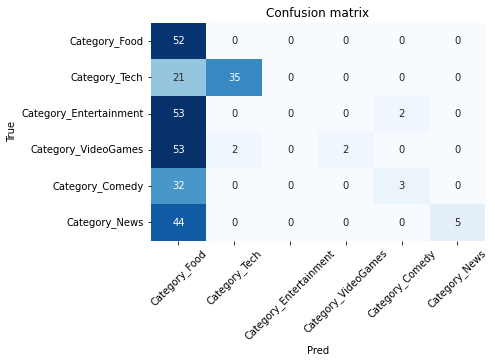

In [276]:
plot_CM(MNB_classifier,X_train_tfidf,X_test_tfidf)

As shown in the model results, we can see that for this combination of tfidf and naives bayes, the model results is quite low were all the performance metrics values has fell below 50%. As shown in the confusion matrix, we can see that there high number of wrong predictions where every category is predicted as food category. This shows a high misclassification rate. Now, lets try to fine tune the model to improve the results and classification performance.

### C: Tuning Parameters

In [90]:
params={'vect__max_features':[10000],
    'vect__max_df':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
        'vect__ngram_range':  [(1,1),(1,2),(2,2)],
        'clf__estimator__fit_prior':[True,False],
       'clf_estimator_alpha':[0.0,1.0]}


p = Pipeline([('vect', CountVectorizer()),('clf', MultiOutputClassifier(MultinomialNB()))])
grid_search = GridSearchCV(p, param_grid=params,scoring='f1_weighted')

In [164]:
grid_search.fit(X_train, y_train)
Tdidf_MNB_classifier_best=grid_search.best_estimator_
Tdidf_MNB_classifier_best=Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=False,alpha=0)))])
Tdidf_MNB_classifier_best

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.7, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf',
                 MultiOutputClassifier(estimator=MultinomialNB(alpha=0,
                                                               fit_prior=False)))])

In [282]:
tdidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_tfidf = tfidf_vectorizer.transform(X)
Tdidf_MNB_classifier_best =MultiOutputClassifier(MultinomialNB(fit_prior=False,alpha=0))

cross_val(Tdidf_MNB_classifier_best,X_tfidf)

Average Accuracy: 0.6866111422172453
Average Precision: 0.9152279107574003
Average Recall: 0.7292895988569124
Average F1: 0.8008938224308705


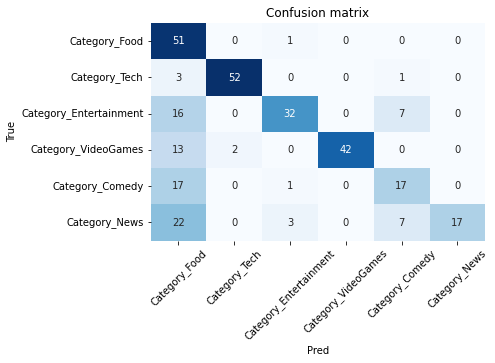

In [283]:
plot_CM(Tdidf_MNB_classifier_best,X_train_tfidf,X_test_tfidf)

We can see that even thought the model performance has increased to 81% from the original  43%. <b>A good thing is that most of the misclassification problems have been solved! The number of wrong predictions where categories are wrongly predicted as food has been greatly reduced</b> Hence, the tuning is quite effective!

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', TdidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB()))])</td>
        <td>0.34</td>
        <td>0.95</td>
        <td>0.33</td>
        <td>0.43</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', TdidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=False,alpha=0)))])</td>
        <td style="background-color:salmon;color:white;">0.69</td>
        <td style="background-color:salmon;color:white;">0.92</td>
        <td style="background-color:salmon;color:white;">0.72</td>
        <td style="background-color:salmon;color:white;">0.80</td>
    </tr>
</table>

From this table we can see that we can use the tuned naives bayes model which is<b>Pipeline([('vect', TdidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=False,alpha=0)))])</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned Tf-idf + Naives Bayes Classifier is 81% 
   

<a id='433'><h2 style="padding:10px;color:white;background-color:lightsalmon;text-align: center;margin-left:auto;margin-right:auto;border-radius:5px;"><font color="white">4.3.3 Model 3: Support Vector Machine</h2>

Third model I will be using is Support Vector Machine. Even though Support Vector Machine is known for supporting binary and multiclass classification. In this assignment, the main target would be predicting multilabelled categories. Hence, I would be using a multiouput classifier which consists of fitting one classifier per target. This is a simple strategy for extending classifiers that do not natively support multi-target classification. It supports the target variables with multiple outputs. Hence, the classifiers used can be either supporting binary or multiclass classification. I have selected SVM as SVM models have generalization in practice, the risk of over-fitting is less in SVM. It also works well with any type of data. 

<a id='4331'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.3.1 BOW + SVM</h3>

### A: Building Model -  SVM

In [284]:
from sklearn.svm import LinearSVC
SVM_classifier =MultiOutputClassifier(LinearSVC())
SVM_classifier.fit(X_train_BOW, y_train)

MultiOutputClassifier(estimator=LinearSVC())

### B: Model Evaluation

In [285]:
BOW_vectorizer = CountVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))
X_train_BOW = BOW_vectorizer.fit_transform(X_train)
X_test_BOW = BOW_vectorizer.transform(X_test)
X_BOW = BOW_vectorizer.transform(X)

In [286]:
cross_val(SVM_classifier,X_BOW)

Average Accuracy: 0.6931970884658455
Average Precision: 0.8615828812073731
Average Recall: 0.8097661936525437
Average F1: 0.8303655436918489


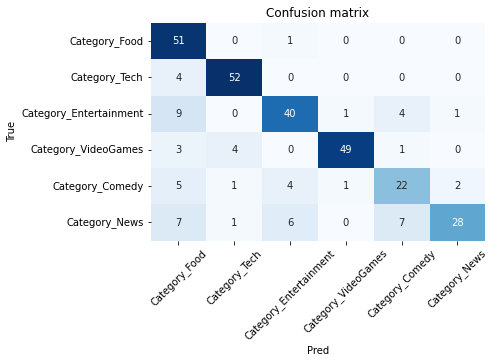

In [287]:
plot_CM(SVM_classifier,X_train_BOW,X_test_BOW)

We can see from the model results that the model performance is quite good where f1-score is at 83% without any tuning. However there are some small amount of misclassfications where most categrries are wrongly predicted as food. 

### C: Tuning Parameters

In [128]:
params={'vect__max_features':[10000],
        'vect__ngram_range':  [(1,1),(1,2),(2,2)],
        'clf__estimator__C': [1,2,3,4,5,6,7,8,9],
        'clf__estimator__dual': [True,False]}
p = Pipeline([('vect', TfidfVectorizer()),('clf', MultiOutputClassifier(LinearSVC()))])
grid_search = GridSearchCV(p, param_grid=params,scoring='f1_weighted')

In [122]:
grid_search.fit(X_train, y_train)
BOW_SVM_classifier_best=grid_search.best_estimator_
BOW_SVM_classifier_best=Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=7,dual=False,fit_intercept=True)))])
BOW_SVM_classifier_best

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf',
                 MultiOutputClassifier(estimator=LinearSVC(C=7, dual=False)))])

In [289]:
BOW_vectorizer = CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))
X_BOW = BOW_vectorizer.fit_transform(X)
X_train_BOW = BOW_vectorizer.fit_transform(X_train)
X_test_BOW = BOW_vectorizer.transform(X_test)
BOW_SVM_classifier_best =MultiOutputClassifier(LinearSVC(C=7,dual=False))
cross_val(BOW_SVM_classifier_best,X_BOW)

Average Accuracy: 0.7103233482642778
Average Precision: 0.8775999785341284
Average Recall: 0.8113103527826785
Average F1: 0.8384614902857243


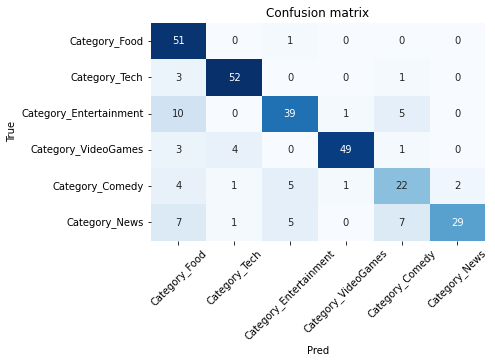

In [290]:
plot_CM(SVM_classifier,X_train_BOW,X_test_BOW)

After some tuning, we can see that the number of True Positives have slightly increased. The model performance have also increased by 1% where the f1-score is 84%

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC()))])</td>
        <td>0.70</td>
        <td>0.86</td>
        <td>0.82</td>
        <td>0.83</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=7,dual=False,fit_intercept=True)))])</td>
        <td style="background-color:salmon;color:white;">0.71</td>
        <td style="background-color:salmon;color:white;">0.87</td>
        <td style="background-color:salmon;color:white;">0.81</td>
        <td style="background-color:salmon;color:white;">0.84</td>
    </tr>
</table>

From this table we can see that we can use the tuned naives bayes model which is<b> Pipeline([('vect', CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=7,dual=False,fit_intercept=True)))])	</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned BOW + SVM Classifier is 84%
   

<a id='4332'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.3.2 Tf-idf + SVM</h3>

### A: Building Model -  SVM

In [292]:
from sklearn.svm import LinearSVC
SVM_classifier =MultiOutputClassifier(LinearSVC())
SVM_classifier.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=LinearSVC())

### B: Model Evaluation

In [56]:
cross_val(SVM_classifier,X_tfidf)

Average Accuracy: 0.7953082137432269
Average Precision: 0.9619834595372687
Average Recall: 0.8265238673132962
Average F1: 0.885360161827491


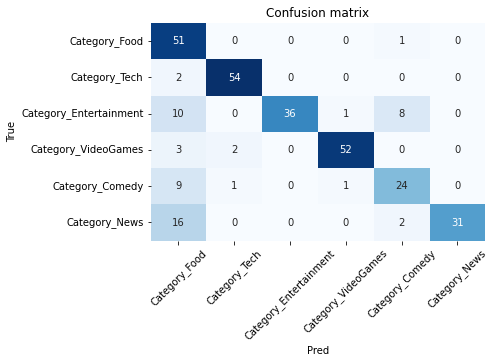

In [294]:
plot_CM(SVM_classifier,X_train_tfidf,X_test_tfidf)

We can see from the model results that the model performance is quite good where f1-score is at 89% without any tuning. However there are some small amount of misclassfications where most categrries are wrongly predicted as food. Now, let's explore the tuning to see if the model performance can be improved。

### C: Tuning Parameters

In [65]:
params={'vect__max_features':[10000],
        'vect__max_df':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
        'vect__ngram_range':  [(1,1),(1,2),(2,2)],
        'clf__estimator__C': [1,2,3,4,5,6,7,8,9],
        'clf__estimator__dual': [True,False]}
p = Pipeline([('vect', TfidfVectorizer()),('clf', MultiOutputClassifier(LinearSVC()))])
grid_search = GridSearchCV(p, param_grid=params,scoring='f1_weighted')

In [68]:
grid_search.fit(X_train, y_train)
tdidf_SVM_classifier_best=grid_search.best_estimator_
tdidf_SVM_classifier_best=Pipeline([('vect', TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=8,dual=True)))])
tdidf_SVM_classifier_best

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.7, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf', MultiOutputClassifier(estimator=LinearSVC(C=8)))])

Average Accuracy: 0.8196318589025756
Average Precision: 0.9564691907922127
Average Recall: 0.8543410368599157
Average F1: 0.8992130258360612


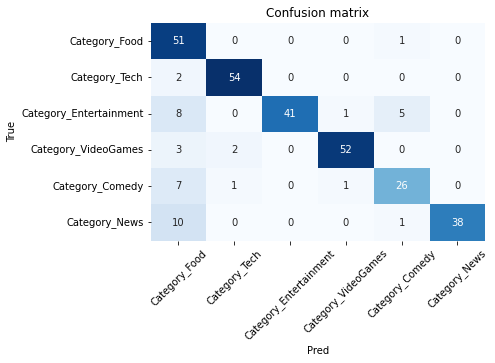

In [297]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))
X_tdidf = tfidf_vectorizer.fit_transform(X)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
tdidf_SVM_classifier_best =MultiOutputClassifier(LinearSVC(C=8,dual=True))
cross_val(tdidf_SVM_classifier_best,X_tfidf)
plot_CM(tdidf_SVM_classifier_best,X_train_tfidf,X_test_tfidf)

After some tuning, we can see that the number of True Positives have slightly increased, especially for entertainment, comedy and news category.For news category, there are 7 more TP after tuning which is a good improvment. The model performance have also increased by 1% where the f1-score is 90%

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC()))])</td>
        <td>0.80</td>
        <td>0.96</td>
        <td>0.83</td>
        <td>0.89</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=8,dual=True)))])</td>
        <td style="background-color:salmon;color:white;">0.82</td>
        <td style="background-color:salmon;color:white;">0.95</td>
        <td style="background-color:salmon;color:white;">0.85</td>
        <td style="background-color:salmon;color:white;">0.90</td>
    </tr>
</table>

From this table we can see that we can use the tuned naives bayes model which is<b>Pipeline([('vect', TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=8,dual=True)))])	</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned Tf-idf + SVM Classifier is 90%
   

<a id='4333'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">4.3.3.3 Word2Vec + SVM</h3>

### A: Building Model -  SVM

In [311]:
from sklearn.svm import LinearSVC
SVM_classifier =MultiOutputClassifier(LinearSVC())
SVM_classifier.fit(X_train_W2V, y_train)

MultiOutputClassifier(estimator=LinearSVC())

### B: Model Evaluation

Average Accuracy: 0.662912933930571
Average Precision: 0.8776955924902622
Average Recall: 0.7304176227279083
Average F1: 0.7887975060432801


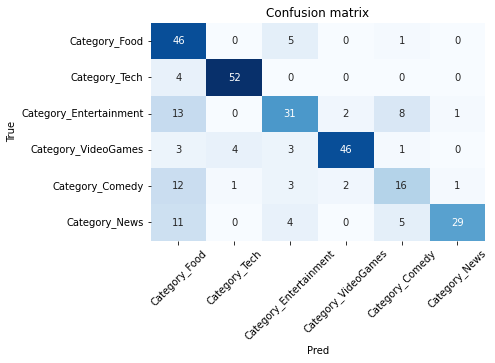

In [312]:
cross_val(SVM_classifier,X_W2V)
plot_CM(SVM_classifier,X_train_W2V,X_test_W2V)

From the results above, we can see that the f1-score is comparatively lower at 79%. However, it is still a decent score. When we look at the confusion matrix, we can see that all classes have a high number of TP except for the comedy classes. We also see that there are quite a number of wrong predictions which are classified as food.

### C: Tuning Parameters

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params={'estimator__C': [1,2,3,4,5,6,7,8,9],
        'estimator__dual': [True,False]}


grid_search = GridSearchCV(MultiOutputClassifier(LinearSVC()), param_grid=params,scoring='f1_weighted')

In [44]:
grid_search.fit(X_train_W2V, y_train)
W2V_SVM_classifier_best=grid_search.best_estimator_
W2V_SVM_classifier_best

MultiOutputClassifier(estimator=LinearSVC(C=7))

In [47]:
W2V_SVM_classifier_best =MultiOutputClassifier(LinearSVC(C=7))

#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate
result = cross_validate(W2V_SVM_classifier_best, X_W2V, y, cv=13, scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_weighted']))
print("Average Recall:", np.mean(result['test_recall_weighted']))
print("Average F1:", np.mean(result['test_f1_weighted']))

Average Accuracy: 0.7011550930649074
Average Precision: 0.8643896078088557
Average Recall: 0.7969590176506676
Average F1: 0.8254206192935806


Average Accuracy: 0.6951987681970885
Average Precision: 0.857469492775411
Average Recall: 0.8039029264783775
Average F1: 0.8248361351935852


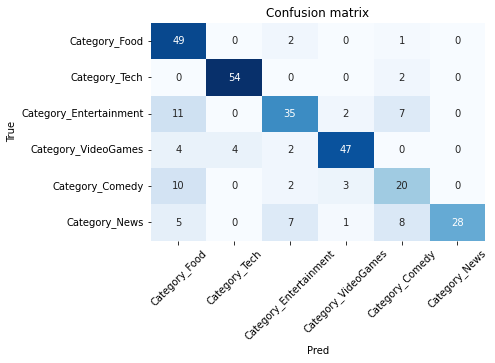

In [314]:
W2V_SVM_classifier_best =MultiOutputClassifier(LinearSVC(C=7))
cross_val(W2V_SVM_classifier_best,X_W2V)
plot_CM(W2V_SVM_classifier_best,X_train_W2V,X_test_W2V)

After much tuning the f1-score increased 3% to 82%. We can also see that the numbe rof misclassified data is reduced and the number of True Positives especially for comedy category has increased from 16 to 20.

### D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model</td>
        <td>Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC()))])</td>
        <td>0.66</td>
        <td>0.88</td>
        <td>0.73</td>
        <td>0.79</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=8,dual=True)))])</td>
        <td style="background-color:salmon;color:white;">0.70</td>
        <td style="background-color:salmon;color:white;">0.86</td>
        <td style="background-color:salmon;color:white;">0.80</td>
        <td style="background-color:salmon;color:white;">0.82</td>
    </tr>
</table>

From this table we can see that we can use the tuned naives bayes model which is<b>Pipeline([('vect', TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=8,dual=True)))])	</b> as it <b>gives the higher precision, accuracy, recall and f1-score.

### Conclusion: Highest f1-score of tuned Tf-idf + SVM Classifier is 82%
   

<a id='5'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">5. Comparison of Models</h1>

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
		<td>Model Used</td>
        <td>Combination</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td rowspan='3'>Logistic Regression</td>
        <td>BOW + Logistic Regression</td>
        <td>Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=0.1, solver='liblinear')))])	</td>
        <td>0.80</td>
        <td>0.90</td>
        <td>0.88</td>
        <td>0.89</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Tf-idf  + Logistic Regression</td>
        <td style="background-color:salmon;color:white;">Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2)),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))])</td>
        <td style="background-color:salmon;color:white;">0.83</td>
        <td style="background-color:salmon;color:white;">0.94</td>
        <td style="background-color:salmon;color:white;">0.88</td>
        <td style="background-color:salmon;color:white;">0.91</td>
    </tr>
    <tr>
        <td>Word2Vec + Logistic Regression</td>
        <td>Word2Vec + MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000,C=100, penalty='l2',solver='lbfgs'))	</td>
        <td>0.66</td>
        <td>0.79</td>
        <td>0.89</td>
        <td>0.84</td>
    </tr>
    <tr>
        <td rowspan='2'>Multinomial Naives Bayes</td>
        <td>BOW + Multinomial Naives Bayes</</td>
        <td>Pipeline([('vect', CountVectorizer(max_df=0.9, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=True,alpha=1)))])	</td>
        <td>0.62</td>
        <td>0.74</td>
        <td>0.95</td>
        <td>0.82</td>
    </tr>
    <tr>
        <td>Tf-idf + Multinomial Naives Bayes</td>
        <td>Pipeline([('vect', TdidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(MultinomialNB(fit_prior=False,alpha=0)))])	</td>
        <td>0.69</td>
        <td>0.92</td>
        <td>0.75</td>
        <td>0.81</td>
    </tr>
    <tr>
        <td rowspan='3'>Support Vector Machine</td>
        <td>BOW + SVM</td>
        <td>Pipeline([('vect', CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=7,dual=False,fit_intercept=True)))])	</td>
        <td>0.71</td>
        <td>0.87</td>
        <td>0.81</td>
        <td>0.84</td>
    </tr>
    <tr>
        <td>Tf-idf+SVM</td>
        <td>Pipeline([('vect', TfidfVectorizer(max_df=0.7, max_features=10000, ngram_range=(1,2))),('clf', MultiOutputClassifier(LinearSVC(C=8,dual=True)))])	</td>
        <td>0.82</td>
        <td>0.95</td>
        <td>0.85</td>
        <td>0.90</td>
    </tr>
    <tr>
        <td>Word2vec +SVM</td>
        <td>OneVsRestClassifier(estimator=LinearSVC(random_state=0))</td>
        <td>0.70</td>
        <td>0.86</td>
        <td>0.80</td>
        <td>0.82</td>
    </tr>
</table>

In general the model perfomances across all models is are very idea; as all the models perfomances are on the average of 85%. I will be choosing the best performing model which is Tf-idf+ logistic regression which has the highest F1-score of 91% which would mean that the False positive and False negatives are kept low with lesser misclassification.

<b>Conclusion</b>: The best combination is the Tuned Tf-idf + Logistic Regression with the parameters of: <b><i>Pipeline([('vect', TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,2)),('clf', MultiOutputClassifier(LogisticRegression(class_weight='balanced', max_iter=3000)))]) </i></b> 
where it gives the <b>highest f1-score of 91% and overall results where accuracy is highest at 83%,  precision is second highest at 94% and recall is second highest at 88%.</b>


<a id='6'><h1 style="background-color:#87CDEE;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">6.Conclusion</h1>

For this report, I have gone through the whole data pipeline from data understanding, preparation, exploratory data analysis, modelling, evaluation, prediction and finally comparison of models. To optimize the performance of the model, I have tried many methodologies and switched the order of the data preparations and modelling preparation steps. The insights derived from a wide variety of models also contributed greatly to the overall objective, which is to classify video category by title and transcript. It is evident that different text representation and different models with different parameters can indeed affect model performance. Additionally, the more models tested, the higher probability of finding a good model for our predictions. I hope this report will provide great value to you and assist you to find the best model that will derive the most accurate and precise predictions in predicting the video category based on title and text. Thank you.